# Data prep and analysis FIA

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


### import and inspect the data first

-->> index is same as 16S index (for easier merging)

take z-score transformed data:

In [4]:
#import this csv file: 20250515_fia_feature_table.csv:
# Read the CSV file into a DataFrame
df = pd.read_csv('FIA/20250516_fia_feature_table_z.csv', index_col=0)

In [5]:
df

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709  -1.440400  -0.106560   0.078032  -0.974798   
366294_255-LP4-16S-0755   0.248334   0.694217   0.700585   1.677521   
366294_237-LP4-16S-0737  -1.440400   0.931053   0.409343  -0.475903   
366294_198-LP4-16S-0698  -1.440400   0.717060   1.654336  -0.477853   
366294_240-LP4-16S-0740  -0.198835   0.440478  -0.354255  -0.478890   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.544175   0.767413   0.173806   0.282925   
366294_196-LP4-16S-0696   0.963135   1.472669  -0.211243   1.189042   
366294_245-LP4-16S-0745   0.708552   0.033668  -0.293762  -0.683720   
366294_252-LP4-16S-0752   1.402000  -0.291180   0.489918  -0.421057   
366294_212-LP4-16S-0712   0.683639  -0.535798  -2.003585  -1.275924   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709  -1.719186  -0.332949  -0.005587  -1.036377   
366294_255-LP4-16S-0755   0.969663  -1.548622   0.827103   0.059906   
366294_237-LP4-16S-0737  -0.040148   0.410502   0.365908   0.227022   
366294_198-LP4-16S-0698   0.223004   0.763982   0.045623   1.313585   
366294_240-LP4-16S-0740   0.257549  -0.432571  -0.450437  -0.665073   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.237773  -1.548622  -0.271866  -2.126141   
366294_196-LP4-16S-0696   1.452594   0.538124  -0.459263  -2.126141   
366294_245-LP4-16S-0745   0.067279  -1.548622  -1.707152  -0.518309   
366294_252-LP4-16S-0752  -0.096739   0.138889   0.070386   0.053945   
366294_212-LP4-16S-0712  -1.719186  -0.040163  -1.707152  -0.904970   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709  -0.325069  -0.260716  ...   1.830829  -1.868436   
366294_255-LP4-16S-0755   0.514847   0.985339  ...   1.052018  -0.206409   
366294_237-LP4-16S-0737   0.896260   0.902828  ...  -0.064397  -1.069373   
366294_198-LP4-16S-0698   0.101444   0.077890  ...   0.201558  -0.831673   
366294_240-LP4-16S-0740   0.286964   0.026106  ...  -0.411394  -1.307938   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731  -1.420459  -1.937279  ...  -0.715840  -0.212840   
366294_196-LP4-16S-0696  -1.420459  -0.202375  ...  -0.363907   1.109263   
366294_245-LP4-16S-0745   0.437772  -0.593520  ...  -0.715840  -0.512398   
366294_252-LP4-16S-0752   1.777225   0.347893  ...  -0.159112   1.352380   
366294_212-LP4-16S-0712  -0.092684  -1.937279  ...  -0.445328  -1.232129   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   1.523388  -1.536343  -1.301796  -1.803303   
366294_255-LP4-16S-0755   0.446246  -0.331663   2.899690   2.682807   
366294_237-LP4-16S-0737  -0.115872  -1.110604   0.534985  -1.803303   
366294_198-LP4-16S-0698  -0.106965  -0.662084   1.211015   1.521386   
366294_240-LP4-16S-0740  -0.320278  -1.299739  -0.741305  -0.156770   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.509061  -0.245739  -0.263968   0.408707   
366294_196-LP4-16S-0696  -0.397817   1.199490  -0.022890   0.689903   
366294_245-LP4-16S-0745  -0.509061  -0.603688  -0.228455   0.663454   
366294_252-LP4-16S-0752  -0.342456   1.358823  -1.563645   0.479999   
366294_212-LP4-16S-0712  -0.509061  -1.187593  -2.132332   0.362912   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  -2.894468  -2.339606  -1.117462  -1.569455  
366294_255-LP4-16S-0755   0.639574   0.977308  -0.782123   0.834207  
366294_237-LP4-16S-0737  -1.193112  -1.299923  -0.235451   0.077561  
366294_198-LP4-16S-0698  -0.541181   0.017851  -0.525899   0.499540  
366294_240-LP4-16S-0740  -2.218268  -5.158020  -4.065674  -1.536419  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.349599   0.412403  -0.090861  -0.31

## step 1: filter out non-changing metabolites (over time):

1. Group by temperature and time and calculate variance for each metabolite.
2. Perform ANOVA for each metabolite across time points within each temperature group to test for significant variability over time.
3. Remove metabolites that do not show significant variability over time within any temperature group.

In [6]:
data_z_df = df.copy()

In [8]:
#import this csv file: 20250515_fia_16S_ITS_shipping_general_metadata.csv
# Read the CSV file into a DataFrame
df2 = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)

In [9]:
#then merge the 'day' and 'temperature' column to the data_z_df :
# Merge the DataFrames on the 'day' and 'temperature' columns
data_z_df = pd.merge(data_z_df, df2[['day', 'temperature']], left_index=True, right_index=True, how='left')

data_z_df

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709  -1.440400  -0.106560   0.078032  -0.974798   
366294_255-LP4-16S-0755   0.248334   0.694217   0.700585   1.677521   
366294_237-LP4-16S-0737  -1.440400   0.931053   0.409343  -0.475903   
366294_198-LP4-16S-0698  -1.440400   0.717060   1.654336  -0.477853   
366294_240-LP4-16S-0740  -0.198835   0.440478  -0.354255  -0.478890   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.544175   0.767413   0.173806   0.282925   
366294_196-LP4-16S-0696   0.963135   1.472669  -0.211243   1.189042   
366294_245-LP4-16S-0745   0.708552   0.033668  -0.293762  -0.683720   
366294_252-LP4-16S-0752   1.402000  -0.291180   0.489918  -0.421057   
366294_212-LP4-16S-0712   0.683639  -0.535798  -2.003585  -1.275924   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709  -1.719186  -0.332949  -0.005587  -1.036377   
366294_255-LP4-16S-0755   0.969663  -1.548622   0.827103   0.059906   
366294_237-LP4-16S-0737  -0.040148   0.410502   0.365908   0.227022   
366294_198-LP4-16S-0698   0.223004   0.763982   0.045623   1.313585   
366294_240-LP4-16S-0740   0.257549  -0.432571  -0.450437  -0.665073   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.237773  -1.548622  -0.271866  -2.126141   
366294_196-LP4-16S-0696   1.452594   0.538124  -0.459263  -2.126141   
366294_245-LP4-16S-0745   0.067279  -1.548622  -1.707152  -0.518309   
366294_252-LP4-16S-0752  -0.096739   0.138889   0.070386   0.053945   
366294_212-LP4-16S-0712  -1.719186  -0.040163  -1.707152  -0.904970   

                         M101.4429  M101.2945  ...  M404.1033  M371.1358  \
366294_209-LP4-16S-0709  -0.325069  -0.260716  ...   1.523388  -1.536343   
366294_255-LP4-16S-0755   0.514847   0.985339  ...   0.446246  -0.331663   
366294_237-LP4-16S-0737   0.896260   0.902828  ...  -0.115872  -1.110604   
366294_198-LP4-16S-0698   0.101444   0.077890  ...  -0.106965  -0.662084   
366294_240-LP4-16S-0740   0.286964   0.026106  ...  -0.320278  -1.299739   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731  -1.420459  -1.937279  ...  -0.509061  -0.245739   
366294_196-LP4-16S-0696  -1.420459  -0.202375  ...  -0.397817   1.199490   
366294_245-LP4-16S-0745   0.437772  -0.593520  ...  -0.509061  -0.603688   
366294_252-LP4-16S-0752   1.777225   0.347893  ...  -0.342456   1.358823   
366294_212-LP4-16S-0712  -0.092684  -1.937279  ...  -0.509061  -1.187593   

                         M280.9969  M487.3036  M600.3885  M602.3878  \
366294_209-LP4-16S-0709  -1.301796  -1.803303  -2.894468  -2.339606   
366294_255-LP4-16S-0755   2.899690   2.682807   0.639574   0.977308   
366294_237-LP4-16S-0737   0.534985  -1.803303  -1.193112  -1.299923   
366294_198-LP4-16S-0698   1.211015   1.521386  -0.541181   0.017851   
366294_240-LP4-16S-0740  -0.741305  -0.156770  -2.218268  -5.158020   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.263968   0.408707   0.349599   0.412403   
366294_196-LP4-16S-0696  -0.022890   0.689903   0.699450   0.851905   
366294_245-LP4-16S-0745  -0.228455   0.663454  -0.015838  -0.098037   
366294_252-LP4-16S-0752  -1.563645   0.479999   0.745098   1.223119   
366294_212-LP4-16S-0712  -2.132332   0.362912  -0.265448   1.454171   

                         M650.4282  M627.4082  day  temperature  
366294_209-LP4-16S-0709  -1.117462  -1.569455    0           20  
366294_255-LP4-16S-0755  -0.782123   0.834207    1            4  
366294_237-LP4-16S-0737  -0.235451   0.077561    2            4  
366294_198-LP4-16S-0698  -0.525899   0.499540    3            4  
366294_240-LP4-16S-0740  -4.065674  -1.536419    4            4  
...                            ...        ...  ...          ...  
366294_231-LP4-16S-0731  -0.090861  -0.315696    6           30  
366294_196-LP4-16S-0696  

In [12]:
import pandas as pd
from scipy.stats import f_oneway

def filter_significant_features_by_temp_and_time(data, group_labels, time_labels, alpha=0.05):
    """
    Filters features (metabolites) that show significant variability over time for each temperature group.
    
    Args:
    - data (pd.DataFrame): The Z-score normalized metabolomics data (samples as rows, features as columns).
    - group_labels (pd.Series): A Series containing the temperature group labels for each sample.
    - time_labels (pd.Series): A Series containing the time point (day) labels for each sample.
    - alpha (float): The significance level for the statistical test (default is 0.05).
    
    Returns:
    - pd.DataFrame: A filtered DataFrame with only the metabolites showing significant variability over time.
    """
    
    # Add the group and time labels as extra columns in the data
    data['temperature_group'] = group_labels
    data['time_point'] = time_labels
    
    # Dictionary to store the filtered features
    significant_data = pd.DataFrame()
    
    # Iterate over each metabolite (column) and check the variability over time within each temperature group
    for feature in data.columns[:-2]:  # Exclude the 'temperature_group' and 'time_point' columns
        print(f"Processing feature: {feature}")  # Debugging
        
        p_values = []  # Store p-values from the ANOVA test for each temperature group

        # For each temperature group, perform ANOVA across time points
        for temp_group in data['temperature_group'].unique():
            group_data = data[data['temperature_group'] == temp_group]  # Data for the specific temperature group
            print(f"Analyzing temperature group: {temp_group}")  # Debugging

            # Gather data for the given metabolite across time points
            metabolite_data = [group_data[group_data['time_point'] == day][feature].dropna() 
                               for day in group_data['time_point'].unique()]
            
            # Debug: Check the number of samples for each time point in each temperature group
            print(f"Time point data for feature {feature}: {metabolite_data}")

            # Perform ANOVA (one-way test) for each metabolite within the current temperature group across time points
            if len(metabolite_data) > 1:  # At least 2 time points for ANOVA
                try:
                    _, p_val = f_oneway(*metabolite_data)  # Perform ANOVA
                    p_values.append(p_val)
                except ValueError:
                    print(f"Not enough data for ANOVA for feature {feature} in temp group {temp_group}")  # Debugging
                    p_values.append(float('nan'))  # If not enough data for ANOVA, append NaN
            else:
                p_values.append(float('nan'))  # If not enough data, append NaN

        # Debug: Check p-values for the feature
        print(f"P-values for feature {feature}: {p_values}")
        
        # If any p-value is below the significance threshold, keep the metabolite
        if any(p < alpha for p in p_values):
            significant_data[feature] = data[feature]
    
    return significant_data

# Example usage
# Assuming 'temperature_group' and 'time_point' are columns that specify the group and time labels for each sample
filtered_significant_data = filter_significant_features_by_temp_and_time(data_z_df, data_z_df['temperature'], data_z_df['day'])

# Display the filtered data with only significant features
print(filtered_significant_data.head())




Processing feature: M275.1469
Analyzing temperature group: 20
Time point data for feature M275.1469: [366294_209-LP4-16S-0709   -1.4404
Name: M275.1469, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M275.1469: [366294_255-LP4-16S-0755    0.248334
366294_217-LP4-16S-0717   -1.440400
366294_251-LP4-16S-0751   -1.440400
Name: M275.1469, dtype: float64, 366294_237-LP4-16S-0737   -1.44040
366294_177-LP4-16S-0677   -1.44040
366294_223-LP4-16S-0723    0.92021
Name: M275.1469, dtype: float64, 366294_198-LP4-16S-0698   -1.440400
366294_207-LP4-16S-0707    0.361317
366294_220-LP4-16S-0720   -0.065136
Name: M275.1469, dtype: float64, 366294_240-LP4-16S-0740   -0.198835
366294_201-LP4-16S-0701   -1.440400
366294_264-LP4-16S-0764   -0.084941
Name: M275.1469, dtype: float64, 366294_188-LP4-16S-0688   -1.440400
366294_259-LP4-16S-0759   -1.440400
366294_210-LP4-16S-0710    0.423392
Name: M275.1469, dtype: float64, 366294_219-LP4-16S-0719   -1.440400
366294_183-LP4-16S-068

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Analyzing temperature group: 4
Time point data for feature M911.2883: [366294_255-LP4-16S-0755    0.872846
366294_217-LP4-16S-0717    1.794841
366294_251-LP4-16S-0751    0.145969
Name: M911.2883, dtype: float64, 366294_237-LP4-16S-0737   -0.208568
366294_177-LP4-16S-0677    0.170235
366294_223-LP4-16S-0723    1.389354
Name: M911.2883, dtype: float64, 366294_198-LP4-16S-0698   -0.451688
366294_207-LP4-16S-0707    0.682079
366294_220-LP4-16S-0720    1.839832
Name: M911.2883, dtype: float64, 366294_240-LP4-16S-0740   -0.764675
366294_201-LP4-16S-0701    0.326381
366294_264-LP4-16S-0764   -0.406672
Name: M911.2883, dtype: float64, 366294_188-LP4-16S-0688   -0.210139
366294_259-LP4-16S-0759    1.260525
366294_210-LP4-16S-0710    0.150222
Name: M911.2883, dtype: float64, 366294_219-LP4-16S-0719   -0.858404
366294_183-LP4-16S-0683    1.270539
366294_248-LP4-16S-0748   -0.190974
Name: M911.2883, dtype: float64, 366294_258-LP4-16S-0758    1.076974
366294_205-LP4-16S-0705    1.673554
366294_229-

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Analyzing temperature group: 17
Time point data for feature M829.8461: [366294_200-LP4-16S-0700   -0.528318
366294_175-LP4-16S-0675   -0.528318
Name: M829.8461, dtype: float64, 366294_222-LP4-16S-0722   -0.528318
366294_174-LP4-16S-0674   -0.528318
366294_190-LP4-16S-0690   -0.528318
Name: M829.8461, dtype: float64, 366294_267-LP4-16S-0767   -0.528318
366294_184-LP4-16S-0684   -0.528318
366294_185-LP4-16S-0685   -0.528318
Name: M829.8461, dtype: float64, 366294_242-LP4-16S-0742   -0.528318
366294_234-LP4-16S-0734   -0.528318
366294_262-LP4-16S-0762   -0.528318
Name: M829.8461, dtype: float64, 366294_187-LP4-16S-0687   -0.528318
366294_186-LP4-16S-0686   -0.528318
366294_261-LP4-16S-0761   -0.528318
Name: M829.8461, dtype: float64, 366294_182-LP4-16S-0682   -0.528318
366294_192-LP4-16S-0692   -0.528318
366294_179-LP4-16S-0679   -0.528318
Name: M829.8461, dtype: float64, 366294_195-LP4-16S-0695   -0.528318
366294_257-LP4-16S-0757   -0.096320
366294_263-LP4-16S-0763    0.153406
Name: M829

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M1179.0861: [366294_200-LP4-16S-0700   -0.963439
366294_175-LP4-16S-0675   -0.963439
Name: M1179.0861, dtype: float64, 366294_222-LP4-16S-0722   -0.079660
366294_174-LP4-16S-0674   -0.963439
366294_190-LP4-16S-0690   -0.963439
Name: M1179.0861, dtype: float64, 366294_267-LP4-16S-0767    0.010555
366294_184-LP4-16S-0684   -0.296613
366294_185-LP4-16S-0685   -0.963439
Name: M1179.0861, dtype: float64, 366294_242-LP4-16S-0742   -0.207612
366294_234-LP4-16S-0734   -0.963439
366294_262-LP4-16S-0762    0.211985
Name: M1179.0861, dtype: float64, 366294_187-LP4-16S-0687    0.281602
366294_186-LP4-16S-0686   -0.032473
366294_261-LP4-16S-0761   -0.161105
Name: M1179.0861, dtype: float64, 366294_182-LP4-16S-0682   -0.257814
366294_192-LP4-16S-0692   -0.963439
366294_179-LP4-16S-0679   -0.084762
Name: M1179.0861, dtype: float64, 366294_195-LP4-16S-0695   -0.963439
366294_257-LP4-16S-0757   -0.963439
366294_263-LP4-16S-0763    0.705578
Nam

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M937.2315: [366294_200-LP4-16S-0700   -0.962558
366294_175-LP4-16S-0675    0.118290
Name: M937.2315, dtype: float64, 366294_222-LP4-16S-0722   -0.264146
366294_174-LP4-16S-0674   -0.136003
366294_190-LP4-16S-0690    0.050687
Name: M937.2315, dtype: float64, 366294_267-LP4-16S-0767   -0.161625
366294_184-LP4-16S-0684   -0.210874
366294_185-LP4-16S-0685   -0.750119
Name: M937.2315, dtype: float64, 366294_242-LP4-16S-0742    1.211361
366294_234-LP4-16S-0734   -0.064606
366294_262-LP4-16S-0762   -1.416001
Name: M937.2315, dtype: float64, 366294_187-LP4-16S-0687    1.001706
366294_186-LP4-16S-0686    0.088953
366294_261-LP4-16S-0761   -0.231665
Name: M937.2315, dtype: float64, 366294_182-LP4-16S-0682   -0.06662
366294_192-LP4-16S-0692   -0.11523
366294_179-LP4-16S-0679   -0.54475
Name: M937.2315, dtype: float64, 366294_195-LP4-16S-0695    0.688141
366294_257-LP4-16S-0757    0.685932
366294_263-LP4-16S-0763    0.983407
Name: M937.23

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M980.9656: [366294_255-LP4-16S-0755   -0.850723
366294_217-LP4-16S-0717   -0.287709
366294_251-LP4-16S-0751   -0.850723
Name: M980.9656, dtype: float64, 366294_237-LP4-16S-0737   -0.316275
366294_177-LP4-16S-0677   -0.850723
366294_223-LP4-16S-0723   -0.850723
Name: M980.9656, dtype: float64, 366294_198-LP4-16S-0698   -0.850723
366294_207-LP4-16S-0707   -0.850723
366294_220-LP4-16S-0720   -0.850723
Name: M980.9656, dtype: float64, 366294_240-LP4-16S-0740   -0.850723
366294_201-LP4-16S-0701   -0.850723
366294_264-LP4-16S-0764   -0.850723
Name: M980.9656, dtype: float64, 366294_188-LP4-16S-0688   -0.850723
366294_259-LP4-16S-0759   -0.318082
366294_210-LP4-16S-0710   -0.119703
Name: M980.9656, dtype: float64, 366294_219-LP4-16S-0719   -0.850723
366294_183-LP4-16S-0683   -0.850723
366294_248-LP4-16S-0748   -0.850723
Name: M980.9656, dtype: float64, 366294_258-LP4-16S-0758    0.370315
366294_205-LP4-16S-0705    0.292386
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M1069.5196: [366294_209-LP4-16S-0709   -0.891335
Name: M1069.5196, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M1069.5196: [366294_255-LP4-16S-0755   -0.891335
366294_217-LP4-16S-0717   -0.184441
366294_251-LP4-16S-0751   -0.891335
Name: M1069.5196, dtype: float64, 366294_237-LP4-16S-0737   -0.891335
366294_177-LP4-16S-0677   -0.891335
366294_223-LP4-16S-0723   -0.284328
Name: M1069.5196, dtype: float64, 366294_198-LP4-16S-0698   -0.441941
366294_207-LP4-16S-0707   -0.240198
366294_220-LP4-16S-0720   -0.379050
Name: M1069.5196, dtype: float64, 366294_240-LP4-16S-0740   -0.891335
366294_201-LP4-16S-0701   -0.891335
366294_264-LP4-16S-0764   -0.891335
Name: M1069.5196, dtype: float64, 366294_188-LP4-16S-0688   -0.277584
366294_259-LP4-16S-0759   -0.891335
366294_210-LP4-16S-0710   -0.435510
Name: M1069.5196, dtype: float64, 366294_219-LP4-16S-0719   -0.891335
366294_183-LP4-16S-0683    0.023302
366294_248-LP4-16S-0748   -0.188026

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M921.9301: [366294_211-LP4-16S-0711    0.271897
366294_260-LP4-16S-0760   -0.510509
366294_208-LP4-16S-0708   -0.510509
Name: M921.9301, dtype: float64, 366294_243-LP4-16S-0743   -0.510509
366294_253-LP4-16S-0753    1.170997
366294_227-LP4-16S-0727    0.304783
Name: M921.9301, dtype: float64, 366294_266-LP4-16S-0766    0.123709
366294_218-LP4-16S-0718   -0.510509
366294_181-LP4-16S-0681    0.215298
Name: M921.9301, dtype: float64, 366294_206-LP4-16S-0706   -0.510509
366294_199-LP4-16S-0699    0.301405
366294_214-LP4-16S-0714    0.795940
Name: M921.9301, dtype: float64, 366294_232-LP4-16S-0732    0.708866
366294_204-LP4-16S-0704    1.165693
366294_265-LP4-16S-0765   -0.510509
Name: M921.9301, dtype: float64, 366294_213-LP4-16S-0713    0.557394
366294_246-LP4-16S-0746    0.476448
366294_231-LP4-16S-0731    0.411600
Name: M921.9301, dtype: float64, 366294_235-LP4-16S-0735   -0.510509
366294_178-LP4-16S-0678    0.588755
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M96.2063: [366294_200-LP4-16S-0700   -1.364799
366294_175-LP4-16S-0675    0.270413
Name: M96.2063, dtype: float64, 366294_222-LP4-16S-0722    0.003687
366294_174-LP4-16S-0674   -1.364799
366294_190-LP4-16S-0690    1.105520
Name: M96.2063, dtype: float64, 366294_267-LP4-16S-0767   -1.364799
366294_184-LP4-16S-0684   -1.364799
366294_185-LP4-16S-0685    0.005791
Name: M96.2063, dtype: float64, 366294_242-LP4-16S-0742    0.285197
366294_234-LP4-16S-0734    0.674183
366294_262-LP4-16S-0762   -0.020005
Name: M96.2063, dtype: float64, 366294_187-LP4-16S-0687   -1.364799
366294_186-LP4-16S-0686    0.841315
366294_261-LP4-16S-0761   -1.364799
Name: M96.2063, dtype: float64, 366294_182-LP4-16S-0682   -1.364799
366294_192-LP4-16S-0692   -0.025825
366294_179-LP4-16S-0679    0.069903
Name: M96.2063, dtype: float64, 366294_195-LP4-16S-0695   -0.301767
366294_257-LP4-16S-0757    1.356241
366294_263-LP4-16S-0763    0.290532
Name: M96.2063, d

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M1029.2111: [366294_200-LP4-16S-0700   -0.873487
366294_175-LP4-16S-0675   -0.401993
Name: M1029.2111, dtype: float64, 366294_222-LP4-16S-0722   -0.080704
366294_174-LP4-16S-0674   -0.159090
366294_190-LP4-16S-0690   -0.246292
Name: M1029.2111, dtype: float64, 366294_267-LP4-16S-0767   -0.174528
366294_184-LP4-16S-0684   -0.384906
366294_185-LP4-16S-0685   -0.873487
Name: M1029.2111, dtype: float64, 366294_242-LP4-16S-0742   -0.379261
366294_234-LP4-16S-0734   -0.174154
366294_262-LP4-16S-0762   -0.873487
Name: M1029.2111, dtype: float64, 366294_187-LP4-16S-0687   -0.873487
366294_186-LP4-16S-0686   -0.265854
366294_261-LP4-16S-0761   -0.187563
Name: M1029.2111, dtype: float64, 366294_182-LP4-16S-0682   -0.873487
366294_192-LP4-16S-0692   -0.873487
366294_179-LP4-16S-0679   -0.873487
Name: M1029.2111, dtype: float64, 366294_195-LP4-16S-0695   -0.478819
366294_257-LP4-16S-0757   -0.873487
366294_263-LP4-16S-0763    0.000209
Name: M1029.2111, dtype: float64, 3

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M952.4598: [nan, 0.5991166178600477, 0.005689597471807351, 0.00098209466757376]
Processing feature: M1182.5699
Analyzing temperature group: 20
Time point data for feature M1182.5699: [366294_209-LP4-16S-0709   -1.181801
Name: M1182.5699, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M1182.5699: [366294_255-LP4-16S-0755   -1.181801
366294_217-LP4-16S-0717   -0.154479
366294_251-LP4-16S-0751   -1.181801
Name: M1182.5699, dtype: float64, 366294_237-LP4-16S-0737   -1.181801
366294_177-LP4-16S-0677   -0.655729
366294_223-LP4-16S-0723   -0.118674
Name: M1182.5699, dtype: float64, 366294_198-LP4-16S-0698   -0.551500
366294_207-LP4-16S-0707   -0.277792
366294_220-LP4-16S-0720   -0.168407
Name: M1182.5699, dtype: float64, 366294_240-LP4-16S-0740   -0.827280
366294_201-LP4-16S-0701   -0.343411
366294_264-LP4-16S-0764   -1.181801
Name: M1182.5699, dtype: float64, 366294_188-LP4-16S-0688   -1.181801
366294_259-LP4-16S-0759   -0.101913
366294_210-LP

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 20
Time point data for feature M1123.5484: [366294_209-LP4-16S-0709   -0.993116
Name: M1123.5484, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M1123.5484: [366294_255-LP4-16S-0755   -0.993116
366294_217-LP4-16S-0717   -0.993116
366294_251-LP4-16S-0751   -0.993116
Name: M1123.5484, dtype: float64, 366294_237-LP4-16S-0737   -0.993116
366294_177-LP4-16S-0677   -0.585836
366294_223-LP4-16S-0723   -0.317641
Name: M1123.5484, dtype: float64, 366294_198-LP4-16S-0698   -0.993116
366294_207-LP4-16S-0707   -0.993116
366294_220-LP4-16S-0720   -0.186857
Name: M1123.5484, dtype: float64, 366294_240-LP4-16S-0740   -0.993116
366294_201-LP4-16S-0701   -0.993116
366294_264-LP4-16S-0764   -0.993116
Name: M1123.5484, dtype: float64, 366294_188-LP4-16S-0688   -0.083085
366294_259-LP4-16S-0759   -0.489962
366294_210-LP4-16S-0710   -0.993116
Name: M1123.5484, dtype: float64, 366294_219-LP4-16S-0719   -0.993116
366294_183-LP4-16S-0683   -0.252197
366

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M923.4393: [366294_200-LP4-16S-0700   -0.615772
366294_175-LP4-16S-0675   -0.615772
Name: M923.4393, dtype: float64, 366294_222-LP4-16S-0722   -0.615772
366294_174-LP4-16S-0674   -0.145002
366294_190-LP4-16S-0690   -0.024997
Name: M923.4393, dtype: float64, 366294_267-LP4-16S-0767   -0.615772
366294_184-LP4-16S-0684   -0.615772
366294_185-LP4-16S-0685   -0.615772
Name: M923.4393, dtype: float64, 366294_242-LP4-16S-0742   -0.615772
366294_234-LP4-16S-0734   -0.615772
366294_262-LP4-16S-0762   -0.615772
Name: M923.4393, dtype: float64, 366294_187-LP4-16S-0687    0.161319
366294_186-LP4-16S-0686   -0.615772
366294_261-LP4-16S-0761   -0.615772
Name: M923.4393, dtype: float64, 366294_182-LP4-16S-0682   -0.615772
366294_192-LP4-16S-0692   -0.615772
366294_179-LP4-16S-0679   -0.615772
Name: M923.4393, dtype: float64, 366294_195-LP4-16S-0695   -0.615772
366294_257-LP4-16S-0757    0.276505
366294_263-LP4-16S-0763    0.144024
Name: M923

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 4
Time point data for feature M476.2762: [366294_255-LP4-16S-0755   -1.103087
366294_217-LP4-16S-0717   -0.375545
366294_251-LP4-16S-0751   -1.103087
Name: M476.2762, dtype: float64, 366294_237-LP4-16S-0737   -1.103087
366294_177-LP4-16S-0677   -1.103087
366294_223-LP4-16S-0723   -0.175809
Name: M476.2762, dtype: float64, 366294_198-LP4-16S-0698   -1.103087
366294_207-LP4-16S-0707   -1.103087
366294_220-LP4-16S-0720   -1.103087
Name: M476.2762, dtype: float64, 366294_240-LP4-16S-0740   -1.103087
366294_201-LP4-16S-0701   -1.103087
366294_264-LP4-16S-0764   -1.103087
Name: M476.2762, dtype: float64, 366294_188-LP4-16S-0688   -1.103087
366294_259-LP4-16S-0759   -1.103087
366294_210-LP4-16S-0710   -1.103087
Name: M476.2762, dtype: float64, 366294_219-LP4-16S-0719   -1.103087
366294_183-LP4-16S-0683    0.308802
366294_248-LP4-16S-0748   -1.103087
Name: M476.2762, dtype: float64, 366294_258-LP4-16S-0758    0.126497
366294_205-LP4-16S-0705   -1.103087
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1028.5464: [366294_255-LP4-16S-0755   -0.898318
366294_217-LP4-16S-0717   -0.898318
366294_251-LP4-16S-0751    0.038320
Name: M1028.5464, dtype: float64, 366294_237-LP4-16S-0737   -0.898318
366294_177-LP4-16S-0677   -0.898318
366294_223-LP4-16S-0723   -0.898318
Name: M1028.5464, dtype: float64, 366294_198-LP4-16S-0698   -0.898318
366294_207-LP4-16S-0707   -0.289046
366294_220-LP4-16S-0720   -0.175968
Name: M1028.5464, dtype: float64, 366294_240-LP4-16S-0740   -0.898318
366294_201-LP4-16S-0701    0.060827
366294_264-LP4-16S-0764   -0.898318
Name: M1028.5464, dtype: float64, 366294_188-LP4-16S-0688   -0.898318
366294_259-LP4-16S-0759   -0.898318
366294_210-LP4-16S-0710   -0.268427
Name: M1028.5464, dtype: float64, 366294_219-LP4-16S-0719   -0.393793
366294_183-LP4-16S-0683   -0.898318
366294_248-LP4-16S-0748   -0.206765
Name: M1028.5464, dtype: float64, 366294_258-LP4-16S-0758   -0.898318
366294_205-LP4-16S-0705   -0.898318
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M909.4419: [366294_200-LP4-16S-0700   -1.144157
366294_175-LP4-16S-0675   -0.075000
Name: M909.4419, dtype: float64, 366294_222-LP4-16S-0722   -0.804979
366294_174-LP4-16S-0674   -0.406567
366294_190-LP4-16S-0690   -0.326555
Name: M909.4419, dtype: float64, 366294_267-LP4-16S-0767   -0.558985
366294_184-LP4-16S-0684   -0.545028
366294_185-LP4-16S-0685   -1.144157
Name: M909.4419, dtype: float64, 366294_242-LP4-16S-0742   -0.355764
366294_234-LP4-16S-0734   -0.095543
366294_262-LP4-16S-0762   -0.635729
Name: M909.4419, dtype: float64, 366294_187-LP4-16S-0687   -1.144157
366294_186-LP4-16S-0686   -0.242018
366294_261-LP4-16S-0761   -0.234659
Name: M909.4419, dtype: float64, 366294_182-LP4-16S-0682   -0.611830
366294_192-LP4-16S-0692   -0.386256
366294_179-LP4-16S-0679   -0.419131
Name: M909.4419, dtype: float64, 366294_195-LP4-16S-0695   -0.053069
366294_257-LP4-16S-0757    0.332539
366294_263-LP4-16S-0763    0.675322
Name: M909

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1153.3751: [366294_255-LP4-16S-0755    0.632278
366294_217-LP4-16S-0717    2.217293
366294_251-LP4-16S-0751    0.358099
Name: M1153.3751, dtype: float64, 366294_237-LP4-16S-0737    0.268596
366294_177-LP4-16S-0677    0.789932
366294_223-LP4-16S-0723    2.322183
Name: M1153.3751, dtype: float64, 366294_198-LP4-16S-0698    0.538326
366294_207-LP4-16S-0707    1.089946
366294_220-LP4-16S-0720    1.227010
Name: M1153.3751, dtype: float64, 366294_240-LP4-16S-0740   -0.618556
366294_201-LP4-16S-0701    0.530235
366294_264-LP4-16S-0764   -0.286054
Name: M1153.3751, dtype: float64, 366294_188-LP4-16S-0688    0.200419
366294_259-LP4-16S-0759    1.298858
366294_210-LP4-16S-0710    0.331243
Name: M1153.3751, dtype: float64, 366294_219-LP4-16S-0719   -0.800745
366294_183-LP4-16S-0683    1.939279
366294_248-LP4-16S-0748    1.289615
Name: M1153.3751, dtype: float64, 366294_258-LP4-16S-0758    1.652357
366294_205-LP4-16S-0705    0.462316
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M342.2378: [366294_211-LP4-16S-0711   -0.469652
366294_260-LP4-16S-0760   -0.649515
366294_208-LP4-16S-0708   -1.024909
Name: M342.2378, dtype: float64, 366294_243-LP4-16S-0743    0.002831
366294_253-LP4-16S-0753    0.296270
366294_227-LP4-16S-0727   -0.248994
Name: M342.2378, dtype: float64, 366294_266-LP4-16S-0766    0.064828
366294_218-LP4-16S-0718   -0.451278
366294_181-LP4-16S-0681    0.262699
Name: M342.2378, dtype: float64, 366294_206-LP4-16S-0706    0.535118
366294_199-LP4-16S-0699    0.834054
366294_214-LP4-16S-0714    1.058764
Name: M342.2378, dtype: float64, 366294_232-LP4-16S-0732    0.802435
366294_204-LP4-16S-0704    2.233893
366294_265-LP4-16S-0765   -0.276084
Name: M342.2378, dtype: float64, 366294_213-LP4-16S-0713   -0.263617
366294_246-LP4-16S-0746   -0.324145
366294_231-LP4-16S-0731   -0.097417
Name: M342.2378, dtype: float64, 366294_235-LP4-16S-0735   -0.568269
366294_178-LP4-16S-0678    0.480958
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M526.2929: [366294_211-LP4-16S-0711   -0.663821
366294_260-LP4-16S-0760   -0.663821
366294_208-LP4-16S-0708   -0.663821
Name: M526.2929, dtype: float64, 366294_243-LP4-16S-0743   -0.663821
366294_253-LP4-16S-0753    0.717909
366294_227-LP4-16S-0727   -0.663821
Name: M526.2929, dtype: float64, 366294_266-LP4-16S-0766    0.656271
366294_218-LP4-16S-0718    0.797941
366294_181-LP4-16S-0681    1.019475
Name: M526.2929, dtype: float64, 366294_206-LP4-16S-0706    1.884451
366294_199-LP4-16S-0699    1.409831
366294_214-LP4-16S-0714    2.128267
Name: M526.2929, dtype: float64, 366294_232-LP4-16S-0732    2.298165
366294_204-LP4-16S-0704    2.412978
366294_265-LP4-16S-0765    0.809914
Name: M526.2929, dtype: float64, 366294_213-LP4-16S-0713    1.030990
366294_246-LP4-16S-0746    0.840969
366294_231-LP4-16S-0731    1.418274
Name: M526.2929, dtype: float64, 366294_235-LP4-16S-0735    0.497715
366294_178-LP4-16S-0678    1.504002
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F stat

Analyzing temperature group: 20
Time point data for feature M829.3895: [366294_209-LP4-16S-0709   -0.764664
Name: M829.3895, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M829.3895: [366294_255-LP4-16S-0755   -0.275324
366294_217-LP4-16S-0717   -0.764664
366294_251-LP4-16S-0751   -0.130860
Name: M829.3895, dtype: float64, 366294_237-LP4-16S-0737   -0.764664
366294_177-LP4-16S-0677   -0.764664
366294_223-LP4-16S-0723   -0.296803
Name: M829.3895, dtype: float64, 366294_198-LP4-16S-0698   -0.764664
366294_207-LP4-16S-0707   -0.764664
366294_220-LP4-16S-0720   -0.764664
Name: M829.3895, dtype: float64, 366294_240-LP4-16S-0740   -0.764664
366294_201-LP4-16S-0701   -0.764664
366294_264-LP4-16S-0764   -0.353529
Name: M829.3895, dtype: float64, 366294_188-LP4-16S-0688   -0.764664
366294_259-LP4-16S-0759   -0.764664
366294_210-LP4-16S-0710   -0.764664
Name: M829.3895, dtype: float64, 366294_219-LP4-16S-0719   -0.764664
366294_183-LP4-16S-0683   -0.764664
366294_248-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M965.4618: [366294_211-LP4-16S-0711   -0.773800
366294_260-LP4-16S-0760   -0.773800
366294_208-LP4-16S-0708   -0.167811
Name: M965.4618, dtype: float64, 366294_243-LP4-16S-0743   -0.773800
366294_253-LP4-16S-0753    0.685170
366294_227-LP4-16S-0727    0.432045
Name: M965.4618, dtype: float64, 366294_266-LP4-16S-0766    0.344609
366294_218-LP4-16S-0718   -0.773800
366294_181-LP4-16S-0681    0.828739
Name: M965.4618, dtype: float64, 366294_206-LP4-16S-0706    0.943531
366294_199-LP4-16S-0699    1.787008
366294_214-LP4-16S-0714   -0.773800
Name: M965.4618, dtype: float64, 366294_232-LP4-16S-0732   -0.773800
366294_204-LP4-16S-0704    1.961074
366294_265-LP4-16S-0765    0.107431
Name: M965.4618, dtype: float64, 366294_213-LP4-16S-0713    0.528487
366294_246-LP4-16S-0746    0.813669
366294_231-LP4-16S-0731    0.697077
Name: M965.4618, dtype: float64, 366294_235-LP4-16S-0735   -0.025403
366294_178-LP4-16S-0678    1.025648
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F stat

Analyzing temperature group: 20
Time point data for feature M1038.0048: [366294_209-LP4-16S-0709   -0.724511
Name: M1038.0048, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M1038.0048: [366294_255-LP4-16S-0755   -0.724511
366294_217-LP4-16S-0717   -0.724511
366294_251-LP4-16S-0751   -0.724511
Name: M1038.0048, dtype: float64, 366294_237-LP4-16S-0737   -0.724511
366294_177-LP4-16S-0677   -0.724511
366294_223-LP4-16S-0723   -0.724511
Name: M1038.0048, dtype: float64, 366294_198-LP4-16S-0698   -0.724511
366294_207-LP4-16S-0707   -0.724511
366294_220-LP4-16S-0720   -0.724511
Name: M1038.0048, dtype: float64, 366294_240-LP4-16S-0740   -0.724511
366294_201-LP4-16S-0701   -0.724511
366294_264-LP4-16S-0764   -0.724511
Name: M1038.0048, dtype: float64, 366294_188-LP4-16S-0688   -0.724511
366294_259-LP4-16S-0759   -0.724511
366294_210-LP4-16S-0710   -0.310675
Name: M1038.0048, dtype: float64, 366294_219-LP4-16S-0719   -0.724511
366294_183-LP4-16S-0683   -0.724511
366

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M695.657: [366294_255-LP4-16S-0755   -0.994251
366294_217-LP4-16S-0717   -0.994251
366294_251-LP4-16S-0751   -0.994251
Name: M695.657, dtype: float64, 366294_237-LP4-16S-0737   -0.994251
366294_177-LP4-16S-0677   -0.994251
366294_223-LP4-16S-0723   -0.994251
Name: M695.657, dtype: float64, 366294_198-LP4-16S-0698   -0.994251
366294_207-LP4-16S-0707   -0.994251
366294_220-LP4-16S-0720   -0.994251
Name: M695.657, dtype: float64, 366294_240-LP4-16S-0740   -0.994251
366294_201-LP4-16S-0701   -0.994251
366294_264-LP4-16S-0764   -0.994251
Name: M695.657, dtype: float64, 366294_188-LP4-16S-0688   -0.994251
366294_259-LP4-16S-0759   -0.994251
366294_210-LP4-16S-0710   -0.994251
Name: M695.657, dtype: float64, 366294_219-LP4-16S-0719   -0.994251
366294_183-LP4-16S-0683   -0.994251
366294_248-LP4-16S-0748   -0.994251
Name: M695.657, dtype: float64, 366294_258-LP4-16S-0758   -0.994251
366294_205-LP4-16S-0705   -0.994251
366294_229-LP4-16S-0729   -0.994251
Name: M695.65

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M698.8242: [nan, nan, 1.581362437610189e-05, 0.006849804393118977]
Processing feature: M800.9277
Analyzing temperature group: 20
Time point data for feature M800.9277: [366294_209-LP4-16S-0709   -0.99705
Name: M800.9277, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M800.9277: [366294_255-LP4-16S-0755   -0.99705
366294_217-LP4-16S-0717   -0.99705
366294_251-LP4-16S-0751   -0.99705
Name: M800.9277, dtype: float64, 366294_237-LP4-16S-0737   -0.99705
366294_177-LP4-16S-0677   -0.99705
366294_223-LP4-16S-0723   -0.99705
Name: M800.9277, dtype: float64, 366294_198-LP4-16S-0698   -0.99705
366294_207-LP4-16S-0707   -0.99705
366294_220-LP4-16S-0720   -0.99705
Name: M800.9277, dtype: float64, 366294_240-LP4-16S-0740   -0.99705
366294_201-LP4-16S-0701   -0.99705
366294_264-LP4-16S-0764   -0.99705
Name: M800.9277, dtype: float64, 366294_188-LP4-16S-0688   -0.99705
366294_259-LP4-16S-0759   -0.99705
366294_210-LP4-16S-0710   -0.99705
Name: M800.927

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M1048.5354: [366294_211-LP4-16S-0711   -0.222032
366294_260-LP4-16S-0760   -0.760702
366294_208-LP4-16S-0708   -0.760702
Name: M1048.5354, dtype: float64, 366294_243-LP4-16S-0743   -0.760702
366294_253-LP4-16S-0753   -0.760702
366294_227-LP4-16S-0727   -0.760702
Name: M1048.5354, dtype: float64, 366294_266-LP4-16S-0766    0.303516
366294_218-LP4-16S-0718    0.161965
366294_181-LP4-16S-0681    0.550173
Name: M1048.5354, dtype: float64, 366294_206-LP4-16S-0706    1.168360
366294_199-LP4-16S-0699    0.779608
366294_214-LP4-16S-0714    0.734506
Name: M1048.5354, dtype: float64, 366294_232-LP4-16S-0732    2.030893
366294_204-LP4-16S-0704    1.458295
366294_265-LP4-16S-0765    0.328100
Name: M1048.5354, dtype: float64, 366294_213-LP4-16S-0713    0.701529
366294_246-LP4-16S-0746    0.234124
366294_231-LP4-16S-0731    0.682474
Name: M1048.5354, dtype: float64, 366294_235-LP4-16S-0735    0.417251
366294_178-LP4-16S-0678    0.485052
366294_196-LP4-16S-0696    1.865873

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M1052.4974: [nan, 0.2480825782311, 0.41696744996952384, 0.007898166148757171]
Processing feature: M865.9284
Analyzing temperature group: 20
Time point data for feature M865.9284: [366294_209-LP4-16S-0709   -0.83119
Name: M865.9284, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M865.9284: [366294_255-LP4-16S-0755   -0.83119
366294_217-LP4-16S-0717   -0.83119
366294_251-LP4-16S-0751   -0.83119
Name: M865.9284, dtype: float64, 366294_237-LP4-16S-0737   -0.83119
366294_177-LP4-16S-0677   -0.83119
366294_223-LP4-16S-0723   -0.83119
Name: M865.9284, dtype: float64, 366294_198-LP4-16S-0698   -0.83119
366294_207-LP4-16S-0707   -0.83119
366294_220-LP4-16S-0720   -0.83119
Name: M865.9284, dtype: float64, 366294_240-LP4-16S-0740   -0.83119
366294_201-LP4-16S-0701   -0.83119
366294_264-LP4-16S-0764   -0.83119
Name: M865.9284, dtype: float64, 366294_188-LP4-16S-0688   -0.83119
366294_259-LP4-16S-0759   -0.83119
366294_210-LP4-16S-0710   -0.83119
Nam

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M1052.8291: [366294_200-LP4-16S-0700   -0.929990
366294_175-LP4-16S-0675   -0.348106
Name: M1052.8291, dtype: float64, 366294_222-LP4-16S-0722    0.823232
366294_174-LP4-16S-0674   -0.929990
366294_190-LP4-16S-0690   -0.929990
Name: M1052.8291, dtype: float64, 366294_267-LP4-16S-0767   -0.148375
366294_184-LP4-16S-0684    0.130705
366294_185-LP4-16S-0685   -0.929990
Name: M1052.8291, dtype: float64, 366294_242-LP4-16S-0742    0.739087
366294_234-LP4-16S-0734    0.297987
366294_262-LP4-16S-0762   -0.929990
Name: M1052.8291, dtype: float64, 366294_187-LP4-16S-0687    1.044465
366294_186-LP4-16S-0686   -0.929990
366294_261-LP4-16S-0761   -0.929990
Name: M1052.8291, dtype: float64, 366294_182-LP4-16S-0682   -0.929990
366294_192-LP4-16S-0692    0.102166
366294_179-LP4-16S-0679    0.483338
Name: M1052.8291, dtype: float64, 366294_195-LP4-16S-0695    0.352146
366294_257-LP4-16S-0757    0.851142
366294_263-LP4-16S-0763    1.673575
Name: M1052.8291, dtype: float64, 3

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 20
Time point data for feature M973.472: [366294_209-LP4-16S-0709   -0.999089
Name: M973.472, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M973.472: [366294_255-LP4-16S-0755   -0.999089
366294_217-LP4-16S-0717   -0.091479
366294_251-LP4-16S-0751   -0.999089
Name: M973.472, dtype: float64, 366294_237-LP4-16S-0737   -0.428343
366294_177-LP4-16S-0677   -0.999089
366294_223-LP4-16S-0723    0.217655
Name: M973.472, dtype: float64, 366294_198-LP4-16S-0698   -0.398869
366294_207-LP4-16S-0707   -0.999089
366294_220-LP4-16S-0720   -0.999089
Name: M973.472, dtype: float64, 366294_240-LP4-16S-0740   -0.999089
366294_201-LP4-16S-0701   -0.192162
366294_264-LP4-16S-0764   -0.999089
Name: M973.472, dtype: float64, 366294_188-LP4-16S-0688   -0.999089
366294_259-LP4-16S-0759   -0.320997
366294_210-LP4-16S-0710   -0.999089
Name: M973.472, dtype: float64, 366294_219-LP4-16S-0719   -0.999089
366294_183-LP4-16S-0683   -0.000392
366294_248-LP4-16S-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1060.5141: [366294_255-LP4-16S-0755   -0.699418
366294_217-LP4-16S-0717   -0.099030
366294_251-LP4-16S-0751   -0.699418
Name: M1060.5141, dtype: float64, 366294_237-LP4-16S-0737   -0.699418
366294_177-LP4-16S-0677   -0.162222
366294_223-LP4-16S-0723   -0.292875
Name: M1060.5141, dtype: float64, 366294_198-LP4-16S-0698   -0.699418
366294_207-LP4-16S-0707   -0.315020
366294_220-LP4-16S-0720   -0.699418
Name: M1060.5141, dtype: float64, 366294_240-LP4-16S-0740   -0.699418
366294_201-LP4-16S-0701   -0.213071
366294_264-LP4-16S-0764   -0.699418
Name: M1060.5141, dtype: float64, 366294_188-LP4-16S-0688   -0.699418
366294_259-LP4-16S-0759   -0.314955
366294_210-LP4-16S-0710   -0.699418
Name: M1060.5141, dtype: float64, 366294_219-LP4-16S-0719   -0.699418
366294_183-LP4-16S-0683   -0.184811
366294_248-LP4-16S-0748   -0.699418
Name: M1060.5141, dtype: float64, 366294_258-LP4-16S-0758   -0.089892
366294_205-LP4-16S-0705   -0.067375
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M541.2728: [366294_200-LP4-16S-0700   -0.717195
366294_175-LP4-16S-0675   -0.717195
Name: M541.2728, dtype: float64, 366294_222-LP4-16S-0722   -0.717195
366294_174-LP4-16S-0674   -0.717195
366294_190-LP4-16S-0690   -0.717195
Name: M541.2728, dtype: float64, 366294_267-LP4-16S-0767   -0.717195
366294_184-LP4-16S-0684   -0.717195
366294_185-LP4-16S-0685   -0.717195
Name: M541.2728, dtype: float64, 366294_242-LP4-16S-0742   -0.717195
366294_234-LP4-16S-0734   -0.717195
366294_262-LP4-16S-0762   -0.717195
Name: M541.2728, dtype: float64, 366294_187-LP4-16S-0687   -0.717195
366294_186-LP4-16S-0686   -0.717195
366294_261-LP4-16S-0761   -0.717195
Name: M541.2728, dtype: float64, 366294_182-LP4-16S-0682   -0.717195
366294_192-LP4-16S-0692   -0.183753
366294_179-LP4-16S-0679   -0.717195
Name: M541.2728, dtype: float64, 366294_195-LP4-16S-0695    0.011131
366294_257-LP4-16S-0757    0.070636
366294_263-LP4-16S-0763    0.599819
Name: M541

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M698.3639: [366294_255-LP4-16S-0755   -0.729779
366294_217-LP4-16S-0717   -0.729779
366294_251-LP4-16S-0751   -0.729779
Name: M698.3639, dtype: float64, 366294_237-LP4-16S-0737   -0.729779
366294_177-LP4-16S-0677   -0.729779
366294_223-LP4-16S-0723   -0.729779
Name: M698.3639, dtype: float64, 366294_198-LP4-16S-0698   -0.729779
366294_207-LP4-16S-0707   -0.729779
366294_220-LP4-16S-0720   -0.424753
Name: M698.3639, dtype: float64, 366294_240-LP4-16S-0740   -0.729779
366294_201-LP4-16S-0701   -0.729779
366294_264-LP4-16S-0764   -0.729779
Name: M698.3639, dtype: float64, 366294_188-LP4-16S-0688   -0.729779
366294_259-LP4-16S-0759   -0.729779
366294_210-LP4-16S-0710   -0.729779
Name: M698.3639, dtype: float64, 366294_219-LP4-16S-0719   -0.729779
366294_183-LP4-16S-0683   -0.729779
366294_248-LP4-16S-0748   -0.729779
Name: M698.3639, dtype: float64, 366294_258-LP4-16S-0758   -0.729779
366294_205-LP4-16S-0705   -0.729779
366294_229-LP4-16S-0729   -0.729779
Name: 

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 4
Time point data for feature M1114.5827: [366294_255-LP4-16S-0755   -0.899907
366294_217-LP4-16S-0717   -0.576471
366294_251-LP4-16S-0751   -0.899907
Name: M1114.5827, dtype: float64, 366294_237-LP4-16S-0737   -0.899907
366294_177-LP4-16S-0677   -0.462912
366294_223-LP4-16S-0723   -0.600141
Name: M1114.5827, dtype: float64, 366294_198-LP4-16S-0698   -0.899907
366294_207-LP4-16S-0707   -0.899907
366294_220-LP4-16S-0720   -0.899907
Name: M1114.5827, dtype: float64, 366294_240-LP4-16S-0740   -0.899907
366294_201-LP4-16S-0701   -0.591274
366294_264-LP4-16S-0764   -0.899907
Name: M1114.5827, dtype: float64, 366294_188-LP4-16S-0688   -0.899907
366294_259-LP4-16S-0759   -0.899907
366294_210-LP4-16S-0710   -0.228209
Name: M1114.5827, dtype: float64, 366294_219-LP4-16S-0719   -0.899907
366294_183-LP4-16S-0683   -0.899907
366294_248-LP4-16S-0748   -0.308028
Name: M1114.5827, dtype: float64, 366294_258-LP4-16S-0758   -0.268899
366294_205-LP4-16S-0705   -0.899907
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1140.5269: [366294_255-LP4-16S-0755   -0.612891
366294_217-LP4-16S-0717   -0.612891
366294_251-LP4-16S-0751   -0.612891
Name: M1140.5269, dtype: float64, 366294_237-LP4-16S-0737   -0.252146
366294_177-LP4-16S-0677   -0.612891
366294_223-LP4-16S-0723   -0.054750
Name: M1140.5269, dtype: float64, 366294_198-LP4-16S-0698   -0.612891
366294_207-LP4-16S-0707   -0.612891
366294_220-LP4-16S-0720   -0.612891
Name: M1140.5269, dtype: float64, 366294_240-LP4-16S-0740   -0.225251
366294_201-LP4-16S-0701   -0.039161
366294_264-LP4-16S-0764   -0.612891
Name: M1140.5269, dtype: float64, 366294_188-LP4-16S-0688   -0.612891
366294_259-LP4-16S-0759   -0.612891
366294_210-LP4-16S-0710   -0.612891
Name: M1140.5269, dtype: float64, 366294_219-LP4-16S-0719   -0.612891
366294_183-LP4-16S-0683   -0.612891
366294_248-LP4-16S-0748   -0.612891
Name: M1140.5269, dtype: float64, 366294_258-LP4-16S-0758   -0.612891
366294_205-LP4-16S-0705   -0.612891
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M318.1666: [366294_255-LP4-16S-0755   -0.856768
366294_217-LP4-16S-0717   -0.856768
366294_251-LP4-16S-0751   -0.856768
Name: M318.1666, dtype: float64, 366294_237-LP4-16S-0737   -0.856768
366294_177-LP4-16S-0677   -0.378196
366294_223-LP4-16S-0723   -0.335895
Name: M318.1666, dtype: float64, 366294_198-LP4-16S-0698   -0.856768
366294_207-LP4-16S-0707   -0.856768
366294_220-LP4-16S-0720   -0.856768
Name: M318.1666, dtype: float64, 366294_240-LP4-16S-0740   -0.856768
366294_201-LP4-16S-0701   -0.856768
366294_264-LP4-16S-0764   -0.856768
Name: M318.1666, dtype: float64, 366294_188-LP4-16S-0688   -0.856768
366294_259-LP4-16S-0759   -0.264144
366294_210-LP4-16S-0710   -0.856768
Name: M318.1666, dtype: float64, 366294_219-LP4-16S-0719   -0.856768
366294_183-LP4-16S-0683   -0.856768
366294_248-LP4-16S-0748   -0.059346
Name: M318.1666, dtype: float64, 366294_258-LP4-16S-0758   -0.856768
366294_205-LP4-16S-0705   -0.107079
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 20
Time point data for feature M220.0635: [366294_209-LP4-16S-0709   -1.62837
Name: M220.0635, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M220.0635: [366294_255-LP4-16S-0755   -1.628370
366294_217-LP4-16S-0717   -0.451571
366294_251-LP4-16S-0751   -1.036214
Name: M220.0635, dtype: float64, 366294_237-LP4-16S-0737   -1.029515
366294_177-LP4-16S-0677   -1.628370
366294_223-LP4-16S-0723   -0.480322
Name: M220.0635, dtype: float64, 366294_198-LP4-16S-0698   -1.210242
366294_207-LP4-16S-0707   -0.750347
366294_220-LP4-16S-0720   -0.491057
Name: M220.0635, dtype: float64, 366294_240-LP4-16S-0740   -1.628370
366294_201-LP4-16S-0701   -0.520770
366294_264-LP4-16S-0764   -1.207898
Name: M220.0635, dtype: float64, 366294_188-LP4-16S-0688   -0.902688
366294_259-LP4-16S-0759   -0.174924
366294_210-LP4-16S-0710   -0.993765
Name: M220.0635, dtype: float64, 366294_219-LP4-16S-0719   -1.080266
366294_183-LP4-16S-0683   -0.299712
366294_248-L

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M149.0262: [366294_200-LP4-16S-0700   -0.904747
366294_175-LP4-16S-0675    1.473541
Name: M149.0262, dtype: float64, 366294_222-LP4-16S-0722    0.692654
366294_174-LP4-16S-0674    0.654620
366294_190-LP4-16S-0690    0.959563
Name: M149.0262, dtype: float64, 366294_267-LP4-16S-0767   -0.239103
366294_184-LP4-16S-0684   -0.984542
366294_185-LP4-16S-0685   -1.375717
Name: M149.0262, dtype: float64, 366294_242-LP4-16S-0742    0.183690
366294_234-LP4-16S-0734    0.779186
366294_262-LP4-16S-0762   -0.815943
Name: M149.0262, dtype: float64, 366294_187-LP4-16S-0687    0.425190
366294_186-LP4-16S-0686    0.817640
366294_261-LP4-16S-0761   -0.659668
Name: M149.0262, dtype: float64, 366294_182-LP4-16S-0682    0.135276
366294_192-LP4-16S-0692    0.668741
366294_179-LP4-16S-0679   -1.086337
Name: M149.0262, dtype: float64, 366294_195-LP4-16S-0695   -0.017837
366294_257-LP4-16S-0757    1.134518
366294_263-LP4-16S-0763    2.068689
Name: M149

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1043.1767: [366294_255-LP4-16S-0755   -0.654548
366294_217-LP4-16S-0717   -0.013042
366294_251-LP4-16S-0751   -0.654548
Name: M1043.1767, dtype: float64, 366294_237-LP4-16S-0737   -0.654548
366294_177-LP4-16S-0677   -0.306338
366294_223-LP4-16S-0723   -0.654548
Name: M1043.1767, dtype: float64, 366294_198-LP4-16S-0698   -0.654548
366294_207-LP4-16S-0707   -0.654548
366294_220-LP4-16S-0720   -0.654548
Name: M1043.1767, dtype: float64, 366294_240-LP4-16S-0740   -0.654548
366294_201-LP4-16S-0701   -0.654548
366294_264-LP4-16S-0764   -0.654548
Name: M1043.1767, dtype: float64, 366294_188-LP4-16S-0688   -0.654548
366294_259-LP4-16S-0759    0.561522
366294_210-LP4-16S-0710   -0.299937
Name: M1043.1767, dtype: float64, 366294_219-LP4-16S-0719   -0.654548
366294_183-LP4-16S-0683   -0.177029
366294_248-LP4-16S-0748   -0.654548
Name: M1043.1767, dtype: float64, 366294_258-LP4-16S-0758   -0.654548
366294_205-LP4-16S-0705   -0.654548
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M864.4261: [nan, 0.6521514185746531, 0.00026684568012805076, 0.08224580277853386]
Processing feature: M242.1139
Analyzing temperature group: 20
Time point data for feature M242.1139: [366294_209-LP4-16S-0709   -0.518396
Name: M242.1139, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M242.1139: [366294_255-LP4-16S-0755   -0.518396
366294_217-LP4-16S-0717   -0.161259
366294_251-LP4-16S-0751   -0.518396
Name: M242.1139, dtype: float64, 366294_237-LP4-16S-0737   -0.518396
366294_177-LP4-16S-0677   -0.518396
366294_223-LP4-16S-0723   -0.518396
Name: M242.1139, dtype: float64, 366294_198-LP4-16S-0698   -0.518396
366294_207-LP4-16S-0707   -0.518396
366294_220-LP4-16S-0720   -0.518396
Name: M242.1139, dtype: float64, 366294_240-LP4-16S-0740   -0.518396
366294_201-LP4-16S-0701   -0.130167
366294_264-LP4-16S-0764   -0.518396
Name: M242.1139, dtype: float64, 366294_188-LP4-16S-0688   -0.518396
366294_259-LP4-16S-0759   -0.518396
366294_210-LP4-16S-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M673.3165: [366294_211-LP4-16S-0711   -0.430476
366294_260-LP4-16S-0760   -0.991256
366294_208-LP4-16S-0708   -0.991256
Name: M673.3165, dtype: float64, 366294_243-LP4-16S-0743    0.130061
366294_253-LP4-16S-0753    0.697916
366294_227-LP4-16S-0727   -0.074908
Name: M673.3165, dtype: float64, 366294_266-LP4-16S-0766    0.062472
366294_218-LP4-16S-0718   -0.185851
366294_181-LP4-16S-0681    0.358117
Name: M673.3165, dtype: float64, 366294_206-LP4-16S-0706    0.419296
366294_199-LP4-16S-0699    0.568905
366294_214-LP4-16S-0714    0.980168
Name: M673.3165, dtype: float64, 366294_232-LP4-16S-0732    0.991782
366294_204-LP4-16S-0704    1.170651
366294_265-LP4-16S-0765   -0.154430
Name: M673.3165, dtype: float64, 366294_213-LP4-16S-0713    0.017181
366294_246-LP4-16S-0746    0.168330
366294_231-LP4-16S-0731    0.370976
Name: M673.3165, dtype: float64, 366294_235-LP4-16S-0735   -0.340578
366294_178-LP4-16S-0678    0.914868
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M1129.1882: [nan, 0.5262942944516906, 0.0003315604841582789, 0.00619378965700761]
Processing feature: M274.1392
Analyzing temperature group: 20
Time point data for feature M274.1392: [366294_209-LP4-16S-0709   -1.031438
Name: M274.1392, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M274.1392: [366294_255-LP4-16S-0755   -1.031438
366294_217-LP4-16S-0717   -1.031438
366294_251-LP4-16S-0751   -1.031438
Name: M274.1392, dtype: float64, 366294_237-LP4-16S-0737   -1.031438
366294_177-LP4-16S-0677   -1.031438
366294_223-LP4-16S-0723   -0.492678
Name: M274.1392, dtype: float64, 366294_198-LP4-16S-0698   -1.031438
366294_207-LP4-16S-0707   -0.484894
366294_220-LP4-16S-0720   -1.031438
Name: M274.1392, dtype: float64, 366294_240-LP4-16S-0740   -1.031438
366294_201-LP4-16S-0701   -0.279509
366294_264-LP4-16S-0764   -1.031438
Name: M274.1392, dtype: float64, 366294_188-LP4-16S-0688   -1.031438
366294_259-LP4-16S-0759   -1.031438
366294_210-LP4-16S-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M1098.5459: [366294_211-LP4-16S-0711    0.567175
366294_260-LP4-16S-0760    0.130801
366294_208-LP4-16S-0708   -0.702815
Name: M1098.5459, dtype: float64, 366294_243-LP4-16S-0743   -0.702815
366294_253-LP4-16S-0753   -0.702815
366294_227-LP4-16S-0727   -0.702815
Name: M1098.5459, dtype: float64, 366294_266-LP4-16S-0766    0.484153
366294_218-LP4-16S-0718    0.767529
366294_181-LP4-16S-0681   -0.702815
Name: M1098.5459, dtype: float64, 366294_206-LP4-16S-0706   -0.702815
366294_199-LP4-16S-0699   -0.702815
366294_214-LP4-16S-0714    1.974157
Name: M1098.5459, dtype: float64, 366294_232-LP4-16S-0732   -0.702815
366294_204-LP4-16S-0704    0.884175
366294_265-LP4-16S-0765   -0.702815
Name: M1098.5459, dtype: float64, 366294_213-LP4-16S-0713    0.799552
366294_246-LP4-16S-0746    0.394280
366294_231-LP4-16S-0731   -0.702815
Name: M1098.5459, dtype: float64, 366294_235-LP4-16S-0735   -0.702815
366294_178-LP4-16S-0678    1.888152
366294_196-LP4-16S-0696   -0.702815

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M765.3639: [366294_255-LP4-16S-0755   -0.872448
366294_217-LP4-16S-0717   -0.872448
366294_251-LP4-16S-0751   -0.872448
Name: M765.3639, dtype: float64, 366294_237-LP4-16S-0737   -0.872448
366294_177-LP4-16S-0677   -0.872448
366294_223-LP4-16S-0723   -0.872448
Name: M765.3639, dtype: float64, 366294_198-LP4-16S-0698   -0.872448
366294_207-LP4-16S-0707   -0.872448
366294_220-LP4-16S-0720   -0.872448
Name: M765.3639, dtype: float64, 366294_240-LP4-16S-0740   -0.872448
366294_201-LP4-16S-0701   -0.872448
366294_264-LP4-16S-0764   -0.872448
Name: M765.3639, dtype: float64, 366294_188-LP4-16S-0688   -0.872448
366294_259-LP4-16S-0759   -0.872448
366294_210-LP4-16S-0710   -0.428382
Name: M765.3639, dtype: float64, 366294_219-LP4-16S-0719   -0.872448
366294_183-LP4-16S-0683   -0.390774
366294_248-LP4-16S-0748   -0.872448
Name: M765.3639, dtype: float64, 366294_258-LP4-16S-0758   -0.872448
366294_205-LP4-16S-0705   -0.090650
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M667.2169: [366294_200-LP4-16S-0700    0.487988
366294_175-LP4-16S-0675    2.033101
Name: M667.2169, dtype: float64, 366294_222-LP4-16S-0722    0.058754
366294_174-LP4-16S-0674    0.834625
366294_190-LP4-16S-0690    0.719702
Name: M667.2169, dtype: float64, 366294_267-LP4-16S-0767   -1.669877
366294_184-LP4-16S-0684   -0.829945
366294_185-LP4-16S-0685   -1.669877
Name: M667.2169, dtype: float64, 366294_242-LP4-16S-0742   -0.324306
366294_234-LP4-16S-0734   -0.040710
366294_262-LP4-16S-0762   -0.550409
Name: M667.2169, dtype: float64, 366294_187-LP4-16S-0687   -0.163820
366294_186-LP4-16S-0686   -1.669877
366294_261-LP4-16S-0761   -0.820357
Name: M667.2169, dtype: float64, 366294_182-LP4-16S-0682   -1.669877
366294_192-LP4-16S-0692   -0.495245
366294_179-LP4-16S-0679   -0.873412
Name: M667.2169, dtype: float64, 366294_195-LP4-16S-0695   -0.737945
366294_257-LP4-16S-0757   -0.098341
366294_263-LP4-16S-0763   -0.028266
Name: M667

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M300.1564: [366294_200-LP4-16S-0700   -0.627514
366294_175-LP4-16S-0675   -0.325816
Name: M300.1564, dtype: float64, 366294_222-LP4-16S-0722   -0.387524
366294_174-LP4-16S-0674   -0.634329
366294_190-LP4-16S-0690   -0.436645
Name: M300.1564, dtype: float64, 366294_267-LP4-16S-0767   -0.204507
366294_184-LP4-16S-0684   -0.666826
366294_185-LP4-16S-0685   -1.053564
Name: M300.1564, dtype: float64, 366294_242-LP4-16S-0742   -0.366831
366294_234-LP4-16S-0734   -0.237517
366294_262-LP4-16S-0762    1.159836
Name: M300.1564, dtype: float64, 366294_187-LP4-16S-0687    0.357847
366294_186-LP4-16S-0686    0.240601
366294_261-LP4-16S-0761   -0.443579
Name: M300.1564, dtype: float64, 366294_182-LP4-16S-0682   -0.450398
366294_192-LP4-16S-0692   -0.967397
366294_179-LP4-16S-0679   -0.493611
Name: M300.1564, dtype: float64, 366294_195-LP4-16S-0695   -0.257938
366294_257-LP4-16S-0757    0.808331
366294_263-LP4-16S-0763    0.049063
Name: M300

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M333.1504: [366294_200-LP4-16S-0700   -0.975488
366294_175-LP4-16S-0675   -0.115666
Name: M333.1504, dtype: float64, 366294_222-LP4-16S-0722   -0.319502
366294_174-LP4-16S-0674    0.311927
366294_190-LP4-16S-0690   -0.072477
Name: M333.1504, dtype: float64, 366294_267-LP4-16S-0767   -0.264045
366294_184-LP4-16S-0684   -0.483856
366294_185-LP4-16S-0685   -2.367575
Name: M333.1504, dtype: float64, 366294_242-LP4-16S-0742    0.000126
366294_234-LP4-16S-0734    0.206631
366294_262-LP4-16S-0762   -1.138850
Name: M333.1504, dtype: float64, 366294_187-LP4-16S-0687    0.426961
366294_186-LP4-16S-0686    0.112406
366294_261-LP4-16S-0761   -0.759836
Name: M333.1504, dtype: float64, 366294_182-LP4-16S-0682   -0.653393
366294_192-LP4-16S-0692   -0.607114
366294_179-LP4-16S-0679   -0.545666
Name: M333.1504, dtype: float64, 366294_195-LP4-16S-0695   -0.447804
366294_257-LP4-16S-0757    0.523622
366294_263-LP4-16S-0763    0.714638
Name: M333

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M617.3118: [nan, 0.5106663159862699, 0.1756810308484799, 0.07302220226347074]
Processing feature: M812.3897
Analyzing temperature group: 20
Time point data for feature M812.3897: [366294_209-LP4-16S-0709   -1.245396
Name: M812.3897, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M812.3897: [366294_255-LP4-16S-0755   -1.245396
366294_217-LP4-16S-0717   -0.366434
366294_251-LP4-16S-0751   -1.245396
Name: M812.3897, dtype: float64, 366294_237-LP4-16S-0737   -1.245396
366294_177-LP4-16S-0677   -1.245396
366294_223-LP4-16S-0723   -0.333406
Name: M812.3897, dtype: float64, 366294_198-LP4-16S-0698   -1.245396
366294_207-LP4-16S-0707   -1.245396
366294_220-LP4-16S-0720   -1.245396
Name: M812.3897, dtype: float64, 366294_240-LP4-16S-0740   -1.245396
366294_201-LP4-16S-0701   -0.143440
366294_264-LP4-16S-0764   -1.245396
Name: M812.3897, dtype: float64, 366294_188-LP4-16S-0688   -0.782883
366294_259-LP4-16S-0759   -0.062044
366294_210-LP4-16S-0710

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M1067.484: [366294_211-LP4-16S-0711   -0.710176
366294_260-LP4-16S-0760   -0.258987
366294_208-LP4-16S-0708   -0.710176
Name: M1067.484, dtype: float64, 366294_243-LP4-16S-0743    4.189541
366294_253-LP4-16S-0753    0.102465
366294_227-LP4-16S-0727   -0.228507
Name: M1067.484, dtype: float64, 366294_266-LP4-16S-0766    0.220352
366294_218-LP4-16S-0718   -0.185489
366294_181-LP4-16S-0681   -0.710176
Name: M1067.484, dtype: float64, 366294_206-LP4-16S-0706    0.986715
366294_199-LP4-16S-0699    0.408737
366294_214-LP4-16S-0714    0.759706
Name: M1067.484, dtype: float64, 366294_232-LP4-16S-0732    0.883709
366294_204-LP4-16S-0704    1.250038
366294_265-LP4-16S-0765   -0.139325
Name: M1067.484, dtype: float64, 366294_213-LP4-16S-0713    0.199073
366294_246-LP4-16S-0746    0.692632
366294_231-LP4-16S-0731    0.593698
Name: M1067.484, dtype: float64, 366294_235-LP4-16S-0735    0.404582
366294_178-LP4-16S-0678    1.311469
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M534.2619: [366294_200-LP4-16S-0700   -0.943944
366294_175-LP4-16S-0675   -0.943944
Name: M534.2619, dtype: float64, 366294_222-LP4-16S-0722   -0.943944
366294_174-LP4-16S-0674   -0.943944
366294_190-LP4-16S-0690   -0.295298
Name: M534.2619, dtype: float64, 366294_267-LP4-16S-0767   -0.943944
366294_184-LP4-16S-0684   -0.943944
366294_185-LP4-16S-0685   -0.943944
Name: M534.2619, dtype: float64, 366294_242-LP4-16S-0742   -0.248777
366294_234-LP4-16S-0734   -0.083433
366294_262-LP4-16S-0762   -0.943944
Name: M534.2619, dtype: float64, 366294_187-LP4-16S-0687   -0.943944
366294_186-LP4-16S-0686    0.302214
366294_261-LP4-16S-0761   -0.943944
Name: M534.2619, dtype: float64, 366294_182-LP4-16S-0682   -0.943944
366294_192-LP4-16S-0692   -0.943944
366294_179-LP4-16S-0679   -0.081821
Name: M534.2619, dtype: float64, 366294_195-LP4-16S-0695    0.479970
366294_257-LP4-16S-0757    0.777639
366294_263-LP4-16S-0763    0.746614
Name: M534

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 20
Time point data for feature M446.1883: [366294_209-LP4-16S-0709   -0.914143
Name: M446.1883, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M446.1883: [366294_255-LP4-16S-0755   -0.914143
366294_217-LP4-16S-0717   -0.914143
366294_251-LP4-16S-0751   -0.914143
Name: M446.1883, dtype: float64, 366294_237-LP4-16S-0737   -0.914143
366294_177-LP4-16S-0677   -0.914143
366294_223-LP4-16S-0723   -0.914143
Name: M446.1883, dtype: float64, 366294_198-LP4-16S-0698   -0.914143
366294_207-LP4-16S-0707   -0.914143
366294_220-LP4-16S-0720   -0.914143
Name: M446.1883, dtype: float64, 366294_240-LP4-16S-0740   -0.914143
366294_201-LP4-16S-0701   -0.914143
366294_264-LP4-16S-0764   -0.914143
Name: M446.1883, dtype: float64, 366294_188-LP4-16S-0688   -0.914143
366294_259-LP4-16S-0759   -0.422081
366294_210-LP4-16S-0710   -0.914143
Name: M446.1883, dtype: float64, 366294_219-LP4-16S-0719   -0.914143
366294_183-LP4-16S-0683   -0.914143
366294_248-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M956.9626: [366294_200-LP4-16S-0700   -0.796818
366294_175-LP4-16S-0675   -0.796818
Name: M956.9626, dtype: float64, 366294_222-LP4-16S-0722   -0.796818
366294_174-LP4-16S-0674   -0.347733
366294_190-LP4-16S-0690   -0.796818
Name: M956.9626, dtype: float64, 366294_267-LP4-16S-0767   -0.796818
366294_184-LP4-16S-0684   -0.796818
366294_185-LP4-16S-0685   -0.796818
Name: M956.9626, dtype: float64, 366294_242-LP4-16S-0742   -0.408621
366294_234-LP4-16S-0734   -0.328964
366294_262-LP4-16S-0762   -0.796818
Name: M956.9626, dtype: float64, 366294_187-LP4-16S-0687   -0.346115
366294_186-LP4-16S-0686   -0.796818
366294_261-LP4-16S-0761   -0.796818
Name: M956.9626, dtype: float64, 366294_182-LP4-16S-0682   -0.387486
366294_192-LP4-16S-0692   -0.254272
366294_179-LP4-16S-0679   -0.356575
Name: M956.9626, dtype: float64, 366294_195-LP4-16S-0695   -0.349075
366294_257-LP4-16S-0757   -0.015695
366294_263-LP4-16S-0763    0.241756
Name: M956

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M1172.0463: [366294_255-LP4-16S-0755   -0.916866
366294_217-LP4-16S-0717   -0.844051
366294_251-LP4-16S-0751   -1.088757
Name: M1172.0463, dtype: float64, 366294_237-LP4-16S-0737   -1.088757
366294_177-LP4-16S-0677   -0.877164
366294_223-LP4-16S-0723   -0.818327
Name: M1172.0463, dtype: float64, 366294_198-LP4-16S-0698   -0.966405
366294_207-LP4-16S-0707   -0.913410
366294_220-LP4-16S-0720   -0.859740
Name: M1172.0463, dtype: float64, 366294_240-LP4-16S-0740   -0.976243
366294_201-LP4-16S-0701   -0.871687
366294_264-LP4-16S-0764   -0.966623
Name: M1172.0463, dtype: float64, 366294_188-LP4-16S-0688   -0.877473
366294_259-LP4-16S-0759   -0.757012
366294_210-LP4-16S-0710   -0.847782
Name: M1172.0463, dtype: float64, 366294_219-LP4-16S-0719   -0.884032
366294_183-LP4-16S-0683   -0.748859
366294_248-LP4-16S-0748   -0.796567
Name: M1172.0463, dtype: float64, 366294_258-LP4-16S-0758   -0.657068
366294_205-LP4-16S-0705   -0.799262
3662

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M355.1991: [366294_255-LP4-16S-0755   -0.968521
366294_217-LP4-16S-0717   -0.968521
366294_251-LP4-16S-0751   -0.968521
Name: M355.1991, dtype: float64, 366294_237-LP4-16S-0737   -0.968521
366294_177-LP4-16S-0677   -0.968521
366294_223-LP4-16S-0723   -0.968521
Name: M355.1991, dtype: float64, 366294_198-LP4-16S-0698   -0.968521
366294_207-LP4-16S-0707   -0.968521
366294_220-LP4-16S-0720   -0.968521
Name: M355.1991, dtype: float64, 366294_240-LP4-16S-0740   -0.968521
366294_201-LP4-16S-0701   -0.968521
366294_264-LP4-16S-0764   -0.968521
Name: M355.1991, dtype: float64, 366294_188-LP4-16S-0688   -0.753191
366294_259-LP4-16S-0759   -0.527266
366294_210-LP4-16S-0710   -0.618242
Name: M355.1991, dtype: float64, 366294_219-LP4-16S-0719   -0.968521
366294_183-LP4-16S-0683   -0.371100
366294_248-LP4-16S-0748   -0.968521
Name: M355.1991, dtype: float64, 366294_258-LP4-16S-0758   -0.418991
366294_205-LP4-16S-0705   -0.286229
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M670.3173: [366294_200-LP4-16S-0700   -0.760743
366294_175-LP4-16S-0675   -0.335088
Name: M670.3173, dtype: float64, 366294_222-LP4-16S-0722   -0.760743
366294_174-LP4-16S-0674   -0.760743
366294_190-LP4-16S-0690   -0.760743
Name: M670.3173, dtype: float64, 366294_267-LP4-16S-0767   -0.335956
366294_184-LP4-16S-0684   -0.394259
366294_185-LP4-16S-0685   -0.760743
Name: M670.3173, dtype: float64, 366294_242-LP4-16S-0742   -0.240881
366294_234-LP4-16S-0734   -0.760743
366294_262-LP4-16S-0762   -0.760743
Name: M670.3173, dtype: float64, 366294_187-LP4-16S-0687   -0.760743
366294_186-LP4-16S-0686   -0.226648
366294_261-LP4-16S-0761   -0.760743
Name: M670.3173, dtype: float64, 366294_182-LP4-16S-0682   -0.760743
366294_192-LP4-16S-0692   -0.350831
366294_179-LP4-16S-0679   -0.760743
Name: M670.3173, dtype: float64, 366294_195-LP4-16S-0695   -0.097570
366294_257-LP4-16S-0757    0.407436
366294_263-LP4-16S-0763    0.021673
Name: M670

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M676.3319: [366294_211-LP4-16S-0711   -0.615252
366294_260-LP4-16S-0760   -0.637707
366294_208-LP4-16S-0708   -1.284566
Name: M676.3319, dtype: float64, 366294_243-LP4-16S-0743    0.210798
366294_253-LP4-16S-0753    0.988745
366294_227-LP4-16S-0727   -0.254634
Name: M676.3319, dtype: float64, 366294_266-LP4-16S-0766    0.115403
366294_218-LP4-16S-0718   -0.026086
366294_181-LP4-16S-0681    0.371628
Name: M676.3319, dtype: float64, 366294_206-LP4-16S-0706    0.196885
366294_199-LP4-16S-0699    1.254629
366294_214-LP4-16S-0714    1.274211
Name: M676.3319, dtype: float64, 366294_232-LP4-16S-0732    0.989780
366294_204-LP4-16S-0704    0.697211
366294_265-LP4-16S-0765   -1.284566
Name: M676.3319, dtype: float64, 366294_213-LP4-16S-0713   -1.284566
366294_246-LP4-16S-0746   -0.290586
366294_231-LP4-16S-0731    0.280152
Name: M676.3319, dtype: float64, 366294_235-LP4-16S-0735   -0.802701
366294_178-LP4-16S-0678    0.540224
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M1028.4824: [nan, 0.5804226216280348, 0.1271524909293026, 0.5162204157563974]
Processing feature: M290.1347
Analyzing temperature group: 20
Time point data for feature M290.1347: [366294_209-LP4-16S-0709   -0.647753
Name: M290.1347, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M290.1347: [366294_255-LP4-16S-0755   -0.647753
366294_217-LP4-16S-0717   -0.647753
366294_251-LP4-16S-0751   -0.647753
Name: M290.1347, dtype: float64, 366294_237-LP4-16S-0737   -0.647753
366294_177-LP4-16S-0677   -0.647753
366294_223-LP4-16S-0723   -0.647753
Name: M290.1347, dtype: float64, 366294_198-LP4-16S-0698   -0.647753
366294_207-LP4-16S-0707   -0.647753
366294_220-LP4-16S-0720   -0.647753
Name: M290.1347, dtype: float64, 366294_240-LP4-16S-0740   -0.647753
366294_201-LP4-16S-0701   -0.647753
366294_264-LP4-16S-0764   -0.647753
Name: M290.1347, dtype: float64, 366294_188-LP4-16S-0688   -0.647753
366294_259-LP4-16S-0759   -0.647753
366294_210-LP4-16S-0710

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M461.1514: [366294_255-LP4-16S-0755    0.619700
366294_217-LP4-16S-0717    0.777011
366294_251-LP4-16S-0751    0.571502
Name: M461.1514, dtype: float64, 366294_237-LP4-16S-0737    0.343019
366294_177-LP4-16S-0677    0.998792
366294_223-LP4-16S-0723    1.350692
Name: M461.1514, dtype: float64, 366294_198-LP4-16S-0698    0.772557
366294_207-LP4-16S-0707    1.088939
366294_220-LP4-16S-0720    1.670648
Name: M461.1514, dtype: float64, 366294_240-LP4-16S-0740   -0.153886
366294_201-LP4-16S-0701    1.314972
366294_264-LP4-16S-0764    0.049393
Name: M461.1514, dtype: float64, 366294_188-LP4-16S-0688    0.568654
366294_259-LP4-16S-0759    1.780771
366294_210-LP4-16S-0710    0.421727
Name: M461.1514, dtype: float64, 366294_219-LP4-16S-0719   -0.056225
366294_183-LP4-16S-0683    1.799668
366294_248-LP4-16S-0748    1.631215
Name: M461.1514, dtype: float64, 366294_258-LP4-16S-0758    1.435878
366294_205-LP4-16S-0705    1.484548
366294_229-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M811.3916: [366294_200-LP4-16S-0700   -0.633908
366294_175-LP4-16S-0675    0.211909
Name: M811.3916, dtype: float64, 366294_222-LP4-16S-0722    0.257501
366294_174-LP4-16S-0674    0.453804
366294_190-LP4-16S-0690    0.407033
Name: M811.3916, dtype: float64, 366294_267-LP4-16S-0767    0.042788
366294_184-LP4-16S-0684   -0.256097
366294_185-LP4-16S-0685   -0.450069
Name: M811.3916, dtype: float64, 366294_242-LP4-16S-0742    0.679758
366294_234-LP4-16S-0734    0.677659
366294_262-LP4-16S-0762    0.275629
Name: M811.3916, dtype: float64, 366294_187-LP4-16S-0687    1.230702
366294_186-LP4-16S-0686    1.087195
366294_261-LP4-16S-0761   -0.272296
Name: M811.3916, dtype: float64, 366294_182-LP4-16S-0682   -0.462181
366294_192-LP4-16S-0692    0.227998
366294_179-LP4-16S-0679   -1.792770
Name: M811.3916, dtype: float64, 366294_195-LP4-16S-0695    0.028489
366294_257-LP4-16S-0757    0.794571
366294_263-LP4-16S-0763    2.845174
Name: M811

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M498.234: [nan, 0.04083499642001305, 4.102899265304748e-06, 0.002101907529748791]
Processing feature: M686.3397
Analyzing temperature group: 20
Time point data for feature M686.3397: [366294_209-LP4-16S-0709   -0.931395
Name: M686.3397, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M686.3397: [366294_255-LP4-16S-0755   -0.931395
366294_217-LP4-16S-0717   -0.931395
366294_251-LP4-16S-0751   -0.931395
Name: M686.3397, dtype: float64, 366294_237-LP4-16S-0737   -0.931395
366294_177-LP4-16S-0677   -0.931395
366294_223-LP4-16S-0723   -0.931395
Name: M686.3397, dtype: float64, 366294_198-LP4-16S-0698   -0.931395
366294_207-LP4-16S-0707   -0.931395
366294_220-LP4-16S-0720   -0.931395
Name: M686.3397, dtype: float64, 366294_240-LP4-16S-0740   -0.931395
366294_201-LP4-16S-0701   -0.931395
366294_264-LP4-16S-0764   -0.931395
Name: M686.3397, dtype: float64, 366294_188-LP4-16S-0688   -0.931395
366294_259-LP4-16S-0759   -0.210720
366294_210-LP4-16S-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M403.2208: [nan, 0.005163112571793471, 0.013758533098515168, 8.718539877841809e-07]
Processing feature: M127.05
Analyzing temperature group: 20
Time point data for feature M127.05: [366294_209-LP4-16S-0709   -0.588847
Name: M127.05, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M127.05: [366294_255-LP4-16S-0755   -0.588847
366294_217-LP4-16S-0717   -0.588847
366294_251-LP4-16S-0751   -0.588847
Name: M127.05, dtype: float64, 366294_237-LP4-16S-0737   -0.588847
366294_177-LP4-16S-0677   -0.588847
366294_223-LP4-16S-0723   -0.588847
Name: M127.05, dtype: float64, 366294_198-LP4-16S-0698   -0.588847
366294_207-LP4-16S-0707   -0.588847
366294_220-LP4-16S-0720   -0.588847
Name: M127.05, dtype: float64, 366294_240-LP4-16S-0740   -0.588847
366294_201-LP4-16S-0701   -0.588847
366294_264-LP4-16S-0764   -0.588847
Name: M127.05, dtype: float64, 366294_188-LP4-16S-0688   -0.588847
366294_259-LP4-16S-0759   -0.588847
366294_210-LP4-16S-0710   -0.5888

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M829.2644: [366294_200-LP4-16S-0700    0.296527
366294_175-LP4-16S-0675    2.328538
Name: M829.2644, dtype: float64, 366294_222-LP4-16S-0722    0.683129
366294_174-LP4-16S-0674    1.084402
366294_190-LP4-16S-0690    0.818672
Name: M829.2644, dtype: float64, 366294_267-LP4-16S-0767    0.496412
366294_184-LP4-16S-0684   -0.361031
366294_185-LP4-16S-0685   -0.891684
Name: M829.2644, dtype: float64, 366294_242-LP4-16S-0742   -0.184483
366294_234-LP4-16S-0734   -0.238114
366294_262-LP4-16S-0762   -0.462573
Name: M829.2644, dtype: float64, 366294_187-LP4-16S-0687   -0.030958
366294_186-LP4-16S-0686    0.028944
366294_261-LP4-16S-0761   -0.570069
Name: M829.2644, dtype: float64, 366294_182-LP4-16S-0682   -0.903577
366294_192-LP4-16S-0692   -0.406452
366294_179-LP4-16S-0679   -0.933235
Name: M829.2644, dtype: float64, 366294_195-LP4-16S-0695   -0.356385
366294_257-LP4-16S-0757    0.015475
366294_263-LP4-16S-0763    0.308462
Name: M829.2644, dtype: float64, 366294_21

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M737.7376: [366294_255-LP4-16S-0755    1.700707
366294_217-LP4-16S-0717    2.633783
366294_251-LP4-16S-0751    1.136287
Name: M737.7376, dtype: float64, 366294_237-LP4-16S-0737    0.861572
366294_177-LP4-16S-0677    1.570455
366294_223-LP4-16S-0723    3.105200
Name: M737.7376, dtype: float64, 366294_198-LP4-16S-0698    0.313375
366294_207-LP4-16S-0707    1.581512
366294_220-LP4-16S-0720    2.040029
Name: M737.7376, dtype: float64, 366294_240-LP4-16S-0740   -0.044625
366294_201-LP4-16S-0701    1.135025
366294_264-LP4-16S-0764   -0.031386
Name: M737.7376, dtype: float64, 366294_188-LP4-16S-0688    0.595435
366294_259-LP4-16S-0759    1.466098
366294_210-LP4-16S-0710    1.008300
Name: M737.7376, dtype: float64, 366294_219-LP4-16S-0719   -0.018354
366294_183-LP4-16S-0683    2.345036
366294_248-LP4-16S-0748    0.903525
Name: M737.7376, dtype: float64, 366294_258-LP4-16S-0758    1.396775
366294_205-LP4-16S-0705    1.182872
366294_229-LP4-16S-0729    0.110655
Name: 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M189.0562: [366294_211-LP4-16S-0711    0.896099
366294_260-LP4-16S-0760    0.251885
366294_208-LP4-16S-0708   -0.553705
Name: M189.0562, dtype: float64, 366294_243-LP4-16S-0743    0.257364
366294_253-LP4-16S-0753    1.138323
366294_227-LP4-16S-0727    0.875795
Name: M189.0562, dtype: float64, 366294_266-LP4-16S-0766    0.666740
366294_218-LP4-16S-0718    0.721524
366294_181-LP4-16S-0681    0.222880
Name: M189.0562, dtype: float64, 366294_206-LP4-16S-0706    0.636127
366294_199-LP4-16S-0699    0.316660
366294_214-LP4-16S-0714    0.286091
Name: M189.0562, dtype: float64, 366294_232-LP4-16S-0732    0.537349
366294_204-LP4-16S-0704    1.603386
366294_265-LP4-16S-0765   -1.325203
Name: M189.0562, dtype: float64, 366294_213-LP4-16S-0713   -0.162890
366294_246-LP4-16S-0746    1.466376
366294_231-LP4-16S-0731   -0.493669
Name: M189.0562, dtype: float64, 366294_235-LP4-16S-0735   -1.069271
366294_178-LP4-16S-0678    0.921447
366294_196-LP4-16S-0696    0.672376
Name: 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M547.1332: [366294_211-LP4-16S-0711   -0.488618
366294_260-LP4-16S-0760   -0.488618
366294_208-LP4-16S-0708   -0.488618
Name: M547.1332, dtype: float64, 366294_243-LP4-16S-0743   -0.488618
366294_253-LP4-16S-0753   -0.488618
366294_227-LP4-16S-0727   -0.488618
Name: M547.1332, dtype: float64, 366294_266-LP4-16S-0766   -0.488618
366294_218-LP4-16S-0718   -0.488618
366294_181-LP4-16S-0681   -0.488618
Name: M547.1332, dtype: float64, 366294_206-LP4-16S-0706   -0.488618
366294_199-LP4-16S-0699   -0.488618
366294_214-LP4-16S-0714   -0.488618
Name: M547.1332, dtype: float64, 366294_232-LP4-16S-0732   -0.488618
366294_204-LP4-16S-0704   -0.488618
366294_265-LP4-16S-0765   -0.488618
Name: M547.1332, dtype: float64, 366294_213-LP4-16S-0713   -0.488618
366294_246-LP4-16S-0746   -0.488618
366294_231-LP4-16S-0731   -0.488618
Name: M547.1332, dtype: float64, 366294_235-LP4-16S-0735   -0.488618
366294_178-LP4-16S-0678   -0.488618
366294_196

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 17
Time point data for feature M788.383: [366294_200-LP4-16S-0700   -1.326971
366294_175-LP4-16S-0675   -1.326971
Name: M788.383, dtype: float64, 366294_222-LP4-16S-0722   -0.134937
366294_174-LP4-16S-0674   -0.130751
366294_190-LP4-16S-0690    0.102979
Name: M788.383, dtype: float64, 366294_267-LP4-16S-0767   -0.241844
366294_184-LP4-16S-0684   -0.654222
366294_185-LP4-16S-0685   -1.326971
Name: M788.383, dtype: float64, 366294_242-LP4-16S-0742    0.282298
366294_234-LP4-16S-0734   -0.439792
366294_262-LP4-16S-0762   -0.722803
Name: M788.383, dtype: float64, 366294_187-LP4-16S-0687    0.419710
366294_186-LP4-16S-0686    0.155641
366294_261-LP4-16S-0761   -0.281936
Name: M788.383, dtype: float64, 366294_182-LP4-16S-0682   -0.692179
366294_192-LP4-16S-0692   -0.088115
366294_179-LP4-16S-0679   -0.347876
Name: M788.383, dtype: float64, 366294_195-LP4-16S-0695   -1.326971
366294_257-LP4-16S-0757    0.740108
366294_263-LP4-16S-0763    0.966934
Name: M788.383, d

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Processing feature: M355.0878
Analyzing temperature group: 20
Time point data for feature M355.0878: [366294_209-LP4-16S-0709   -1.582183
Name: M355.0878, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M355.0878: [366294_255-LP4-16S-0755    0.073248
366294_217-LP4-16S-0717    0.916314
366294_251-LP4-16S-0751   -0.151292
Name: M355.0878, dtype: float64, 366294_237-LP4-16S-0737   -0.956083
366294_177-LP4-16S-0677   -0.048938
366294_223-LP4-16S-0723    1.844515
Name: M355.0878, dtype: float64, 366294_198-LP4-16S-0698   -1.028937
366294_207-LP4-16S-0707    0.734696
366294_220-LP4-16S-0720    1.258708
Name: M355.0878, dtype: float64, 366294_240-LP4-16S-0740   -1.402351
366294_201-LP4-16S-0701    0.130692
366294_264-LP4-16S-0764   -1.442038
Name: M355.0878, dtype: float64, 366294_188-LP4-16S-0688   -0.187350
366294_259-LP4-16S-0759    0.976544
366294_210-LP4-16S-0710    0.516967
Name: M355.0878, dtype: float64, 366294_219-LP4-16S-0719   -1.455368
366294_183-LP4-16

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M636.304: [366294_211-LP4-16S-0711   -0.216580
366294_260-LP4-16S-0760   -1.044224
366294_208-LP4-16S-0708   -1.044224
Name: M636.304, dtype: float64, 366294_243-LP4-16S-0743    1.114781
366294_253-LP4-16S-0753    1.873275
366294_227-LP4-16S-0727    0.533739
Name: M636.304, dtype: float64, 366294_266-LP4-16S-0766    0.829264
366294_218-LP4-16S-0718    0.302725
366294_181-LP4-16S-0681    1.075675
Name: M636.304, dtype: float64, 366294_206-LP4-16S-0706    1.243782
366294_199-LP4-16S-0699    1.553522
366294_214-LP4-16S-0714    1.848296
Name: M636.304, dtype: float64, 366294_232-LP4-16S-0732    1.413117
366294_204-LP4-16S-0704    1.943824
366294_265-LP4-16S-0765   -1.044224
Name: M636.304, dtype: float64, 366294_213-LP4-16S-0713    0.286771
366294_246-LP4-16S-0746    0.307415
366294_231-LP4-16S-0731    0.848066
Name: M636.304, dtype: float64, 366294_235-LP4-16S-0735   -0.105685
366294_178-LP4-16S-0678    1.531035
366294_196-LP4-16

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M631.3059: [366294_211-LP4-16S-0711   -0.349474
366294_260-LP4-16S-0760   -0.610982
366294_208-LP4-16S-0708   -0.998355
Name: M631.3059, dtype: float64, 366294_243-LP4-16S-0743    0.050476
366294_253-LP4-16S-0753    0.699796
366294_227-LP4-16S-0727    0.048627
Name: M631.3059, dtype: float64, 366294_266-LP4-16S-0766    0.050533
366294_218-LP4-16S-0718   -0.112150
366294_181-LP4-16S-0681    0.348936
Name: M631.3059, dtype: float64, 366294_206-LP4-16S-0706    0.512949
366294_199-LP4-16S-0699    0.566456
366294_214-LP4-16S-0714    0.852500
Name: M631.3059, dtype: float64, 366294_232-LP4-16S-0732    0.816868
366294_204-LP4-16S-0704    1.200398
366294_265-LP4-16S-0765   -0.192243
Name: M631.3059, dtype: float64, 366294_213-LP4-16S-0713    0.015413
366294_246-LP4-16S-0746   -0.092235
366294_231-LP4-16S-0731    0.405857
Name: M631.3059, dtype: float64, 366294_235-LP4-16S-0735   -0.190786
366294_178-LP4-16S-0678    0.713075
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M203.1066: [366294_200-LP4-16S-0700   -0.598288
366294_175-LP4-16S-0675    0.199462
Name: M203.1066, dtype: float64, 366294_222-LP4-16S-0722    0.059603
366294_174-LP4-16S-0674   -0.598288
366294_190-LP4-16S-0690   -0.598288
Name: M203.1066, dtype: float64, 366294_267-LP4-16S-0767   -0.598288
366294_184-LP4-16S-0684   -0.598288
366294_185-LP4-16S-0685   -0.598288
Name: M203.1066, dtype: float64, 366294_242-LP4-16S-0742    0.062037
366294_234-LP4-16S-0734   -0.598288
366294_262-LP4-16S-0762   -0.598288
Name: M203.1066, dtype: float64, 366294_187-LP4-16S-0687    0.286070
366294_186-LP4-16S-0686    0.239490
366294_261-LP4-16S-0761   -0.598288
Name: M203.1066, dtype: float64, 366294_182-LP4-16S-0682   -0.598288
366294_192-LP4-16S-0692   -0.598288
366294_179-LP4-16S-0679   -0.598288
Name: M203.1066, dtype: float64, 366294_195-LP4-16S-0695   -0.598288
366294_257-LP4-16S-0757    0.286091
366294_263-LP4-16S-0763   -0.598288
Name: M203

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M165.0544: [nan, 0.9666578096681695, 0.02407448190471013, 0.3610245786224436]
Processing feature: M179.0548
Analyzing temperature group: 20
Time point data for feature M179.0548: [366294_209-LP4-16S-0709   -1.271312
Name: M179.0548, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M179.0548: [366294_255-LP4-16S-0755    0.371011
366294_217-LP4-16S-0717    1.504091
366294_251-LP4-16S-0751   -0.229976
Name: M179.0548, dtype: float64, 366294_237-LP4-16S-0737   -0.463731
366294_177-LP4-16S-0677    0.709354
366294_223-LP4-16S-0723    2.543982
Name: M179.0548, dtype: float64, 366294_198-LP4-16S-0698   -0.628322
366294_207-LP4-16S-0707    0.831862
366294_220-LP4-16S-0720    2.141202
Name: M179.0548, dtype: float64, 366294_240-LP4-16S-0740   -1.401774
366294_201-LP4-16S-0701    0.370032
366294_264-LP4-16S-0764   -1.358977
Name: M179.0548, dtype: float64, 366294_188-LP4-16S-0688   -0.227312
366294_259-LP4-16S-0759    1.543631
366294_210-LP4-16S-0710

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 20
Time point data for feature M249.0753: [366294_209-LP4-16S-0709   -0.062191
Name: M249.0753, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M249.0753: [366294_255-LP4-16S-0755    2.765159
366294_217-LP4-16S-0717    0.808538
366294_251-LP4-16S-0751    0.975870
Name: M249.0753, dtype: float64, 366294_237-LP4-16S-0737    1.047473
366294_177-LP4-16S-0677    1.557269
366294_223-LP4-16S-0723    1.171859
Name: M249.0753, dtype: float64, 366294_198-LP4-16S-0698    1.595425
366294_207-LP4-16S-0707    0.975496
366294_220-LP4-16S-0720    0.057721
Name: M249.0753, dtype: float64, 366294_240-LP4-16S-0740    0.551462
366294_201-LP4-16S-0701   -0.243639
366294_264-LP4-16S-0764    0.840382
Name: M249.0753, dtype: float64, 366294_188-LP4-16S-0688    1.771989
366294_259-LP4-16S-0759    0.161559
366294_210-LP4-16S-0710    1.223533
Name: M249.0753, dtype: float64, 366294_219-LP4-16S-0719    1.285621
366294_183-LP4-16S-0683    1.940259
366294_248-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M342.1645: [366294_255-LP4-16S-0755   -0.98503
366294_217-LP4-16S-0717   -0.98503
366294_251-LP4-16S-0751   -0.98503
Name: M342.1645, dtype: float64, 366294_237-LP4-16S-0737   -0.985030
366294_177-LP4-16S-0677   -0.985030
366294_223-LP4-16S-0723   -0.258761
Name: M342.1645, dtype: float64, 366294_198-LP4-16S-0698   -0.98503
366294_207-LP4-16S-0707   -0.98503
366294_220-LP4-16S-0720   -0.98503
Name: M342.1645, dtype: float64, 366294_240-LP4-16S-0740   -0.985030
366294_201-LP4-16S-0701    0.419215
366294_264-LP4-16S-0764   -0.985030
Name: M342.1645, dtype: float64, 366294_188-LP4-16S-0688   -0.125348
366294_259-LP4-16S-0759    0.068118
366294_210-LP4-16S-0710   -0.985030
Name: M342.1645, dtype: float64, 366294_219-LP4-16S-0719   -0.985030
366294_183-LP4-16S-0683   -0.985030
366294_248-LP4-16S-0748   -0.030824
Name: M342.1645, dtype: float64, 366294_258-LP4-16S-0758    0.082228
366294_205-LP4-16S-0705   -0.985030
366294_229-LP4-16

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 4
Time point data for feature M543.2804: [366294_255-LP4-16S-0755   -1.19069
366294_217-LP4-16S-0717   -1.19069
366294_251-LP4-16S-0751   -1.19069
Name: M543.2804, dtype: float64, 366294_237-LP4-16S-0737   -1.190690
366294_177-LP4-16S-0677   -1.190690
366294_223-LP4-16S-0723   -0.011893
Name: M543.2804, dtype: float64, 366294_198-LP4-16S-0698   -1.190690
366294_207-LP4-16S-0707   -0.560382
366294_220-LP4-16S-0720   -0.117616
Name: M543.2804, dtype: float64, 366294_240-LP4-16S-0740   -1.19069
366294_201-LP4-16S-0701   -1.19069
366294_264-LP4-16S-0764   -1.19069
Name: M543.2804, dtype: float64, 366294_188-LP4-16S-0688   -0.429352
366294_259-LP4-16S-0759   -0.470725
366294_210-LP4-16S-0710   -1.190690
Name: M543.2804, dtype: float64, 366294_219-LP4-16S-0719   -1.190690
366294_183-LP4-16S-0683    0.331501
366294_248-LP4-16S-0748   -0.354301
Name: M543.2804, dtype: float64, 366294_258-LP4-16S-0758   -0.340013
366294_205-LP4-16S-0705   -0.045531
366294_229-LP4-16

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M741.3556: [366294_255-LP4-16S-0755   -0.728428
366294_217-LP4-16S-0717   -0.728428
366294_251-LP4-16S-0751   -0.728428
Name: M741.3556, dtype: float64, 366294_237-LP4-16S-0737   -0.728428
366294_177-LP4-16S-0677   -0.728428
366294_223-LP4-16S-0723   -0.728428
Name: M741.3556, dtype: float64, 366294_198-LP4-16S-0698   -0.728428
366294_207-LP4-16S-0707   -0.728428
366294_220-LP4-16S-0720   -0.278354
Name: M741.3556, dtype: float64, 366294_240-LP4-16S-0740   -0.728428
366294_201-LP4-16S-0701   -0.728428
366294_264-LP4-16S-0764   -0.728428
Name: M741.3556, dtype: float64, 366294_188-LP4-16S-0688   -0.728428
366294_259-LP4-16S-0759   -0.728428
366294_210-LP4-16S-0710   -0.728428
Name: M741.3556, dtype: float64, 366294_219-LP4-16S-0719   -0.728428
366294_183-LP4-16S-0683    0.075987
366294_248-LP4-16S-0748   -0.728428
Name: M741.3556, dtype: float64, 366294_258-LP4-16S-0758   -0.728428
366294_205-LP4-16S-0705   -0.351324
366294_229-LP4-16S-0729   -0.728428
Name: 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M1061.3418: [366294_211-LP4-16S-0711    1.244072
366294_260-LP4-16S-0760    0.100246
366294_208-LP4-16S-0708   -0.483372
Name: M1061.3418, dtype: float64, 366294_243-LP4-16S-0743    0.171825
366294_253-LP4-16S-0753    2.136866
366294_227-LP4-16S-0727    0.453964
Name: M1061.3418, dtype: float64, 366294_266-LP4-16S-0766   -0.466575
366294_218-LP4-16S-0718   -0.723407
366294_181-LP4-16S-0681   -0.078952
Name: M1061.3418, dtype: float64, 366294_206-LP4-16S-0706   -0.254121
366294_199-LP4-16S-0699   -0.267630
366294_214-LP4-16S-0714   -0.166619
Name: M1061.3418, dtype: float64, 366294_232-LP4-16S-0732   -0.429329
366294_204-LP4-16S-0704    0.095300
366294_265-LP4-16S-0765   -1.198002
Name: M1061.3418, dtype: float64, 366294_213-LP4-16S-0713   -1.184755
366294_246-LP4-16S-0746   -1.338135
366294_231-LP4-16S-0731   -1.055922
Name: M1061.3418, dtype: float64, 366294_235-LP4-16S-0735   -1.491479
366294_178-LP4-16S-0678   -0.837188
366

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M473.2367: [366294_255-LP4-16S-0755   -1.255700
366294_217-LP4-16S-0717   -1.255700
366294_251-LP4-16S-0751   -1.008673
Name: M473.2367, dtype: float64, 366294_237-LP4-16S-0737   -1.255700
366294_177-LP4-16S-0677   -0.863852
366294_223-LP4-16S-0723   -0.788009
Name: M473.2367, dtype: float64, 366294_198-LP4-16S-0698   -0.921659
366294_207-LP4-16S-0707   -0.779895
366294_220-LP4-16S-0720   -0.582255
Name: M473.2367, dtype: float64, 366294_240-LP4-16S-0740   -1.255700
366294_201-LP4-16S-0701   -0.631262
366294_264-LP4-16S-0764   -0.943617
Name: M473.2367, dtype: float64, 366294_188-LP4-16S-0688   -0.550140
366294_259-LP4-16S-0759   -0.485623
366294_210-LP4-16S-0710   -0.734333
Name: M473.2367, dtype: float64, 366294_219-LP4-16S-0719   -1.255700
366294_183-LP4-16S-0683   -0.260148
366294_248-LP4-16S-0748   -0.517741
Name: M473.2367, dtype: float64, 366294_258-LP4-16S-0758   -0.388407
366294_205-LP4-16S-0705   -0.389723
366294_229-LP4-16S-0729   -0.734074
Name: 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

P-values for feature M691.3386: [nan, 0.3609158224605664, 0.034584961808617226, 0.018966727048042212]
Processing feature: M102.0545
Analyzing temperature group: 20
Time point data for feature M102.0545: [366294_209-LP4-16S-0709   -1.066912
Name: M102.0545, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M102.0545: [366294_255-LP4-16S-0755   -0.835210
366294_217-LP4-16S-0717   -0.192009
366294_251-LP4-16S-0751   -0.327837
Name: M102.0545, dtype: float64, 366294_237-LP4-16S-0737   -0.833666
366294_177-LP4-16S-0677   -0.671306
366294_223-LP4-16S-0723    0.060669
Name: M102.0545, dtype: float64, 366294_198-LP4-16S-0698   -1.017309
366294_207-LP4-16S-0707   -0.166386
366294_220-LP4-16S-0720    0.065995
Name: M102.0545, dtype: float64, 366294_240-LP4-16S-0740   -1.073223
366294_201-LP4-16S-0701   -0.444121
366294_264-LP4-16S-0764   -1.396406
Name: M102.0545, dtype: float64, 366294_188-LP4-16S-0688   -1.227552
366294_259-LP4-16S-0759    0.122693
366294_210-LP4-16S-0

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F stat

Time point data for feature M442.1964: [366294_200-LP4-16S-0700   -0.461325
366294_175-LP4-16S-0675   -0.461325
Name: M442.1964, dtype: float64, 366294_222-LP4-16S-0722   -0.461325
366294_174-LP4-16S-0674   -0.461325
366294_190-LP4-16S-0690   -0.461325
Name: M442.1964, dtype: float64, 366294_267-LP4-16S-0767   -0.461325
366294_184-LP4-16S-0684   -0.461325
366294_185-LP4-16S-0685   -0.461325
Name: M442.1964, dtype: float64, 366294_242-LP4-16S-0742   -0.461325
366294_234-LP4-16S-0734   -0.461325
366294_262-LP4-16S-0762   -0.461325
Name: M442.1964, dtype: float64, 366294_187-LP4-16S-0687   -0.461325
366294_186-LP4-16S-0686   -0.461325
366294_261-LP4-16S-0761   -0.461325
Name: M442.1964, dtype: float64, 366294_182-LP4-16S-0682   -0.461325
366294_192-LP4-16S-0692   -0.461325
366294_179-LP4-16S-0679   -0.461325
Name: M442.1964, dtype: float64, 366294_195-LP4-16S-0695   -0.461325
366294_257-LP4-16S-0757   -0.461325
366294_263-LP4-16S-0763   -0.461325
Name: M442.1964, dtype: float64, 366294_21

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M792.3887: [366294_200-LP4-16S-0700   -0.802757
366294_175-LP4-16S-0675   -0.802757
Name: M792.3887, dtype: float64, 366294_222-LP4-16S-0722   -0.802757
366294_174-LP4-16S-0674   -0.802757
366294_190-LP4-16S-0690   -0.802757
Name: M792.3887, dtype: float64, 366294_267-LP4-16S-0767   -0.802757
366294_184-LP4-16S-0684   -0.802757
366294_185-LP4-16S-0685   -0.802757
Name: M792.3887, dtype: float64, 366294_242-LP4-16S-0742   -0.802757
366294_234-LP4-16S-0734   -0.451579
366294_262-LP4-16S-0762   -0.802757
Name: M792.3887, dtype: float64, 366294_187-LP4-16S-0687   -0.426434
366294_186-LP4-16S-0686   -0.196330
366294_261-LP4-16S-0761   -0.802757
Name: M792.3887, dtype: float64, 366294_182-LP4-16S-0682   -0.802757
366294_192-LP4-16S-0692   -0.303463
366294_179-LP4-16S-0679   -0.802757
Name: M792.3887, dtype: float64, 366294_195-LP4-16S-0695   -0.247531
366294_257-LP4-16S-0757   -0.802757
366294_263-LP4-16S-0763    0.441058
Name: M792

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M413.1296: [366294_209-LP4-16S-0709   -0.499188
Name: M413.1296, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M413.1296: [366294_255-LP4-16S-0755    0.156218
366294_217-LP4-16S-0717    0.667589
366294_251-LP4-16S-0751   -0.081553
Name: M413.1296, dtype: float64, 366294_237-LP4-16S-0737   -0.030120
366294_177-LP4-16S-0677    0.590391
366294_223-LP4-16S-0723    1.457268
Name: M413.1296, dtype: float64, 366294_198-LP4-16S-0698   -0.156186
366294_207-LP4-16S-0707    0.774656
366294_220-LP4-16S-0720    1.870634
Name: M413.1296, dtype: float64, 366294_240-LP4-16S-0740   -0.331336
366294_201-LP4-16S-0701    0.684012
366294_264-LP4-16S-0764   -0.358178
Name: M413.1296, dtype: float64, 366294_188-LP4-16S-0688    0.282938
366294_259-LP4-16S-0759    2.104540
366294_210-LP4-16S-0710    1.177111
Name: M413.1296, dtype: float64, 366294_219-LP4-16S-0719    0.103030
366294_183-LP4-16S-0683    2.171598
366294_248-LP4-16S-0748    0.859195
Name: M

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M691.336: [366294_211-LP4-16S-0711   -0.468725
366294_260-LP4-16S-0760   -0.468725
366294_208-LP4-16S-0708   -0.468725
Name: M691.336, dtype: float64, 366294_243-LP4-16S-0743   -0.468725
366294_253-LP4-16S-0753    0.019830
366294_227-LP4-16S-0727   -0.468725
Name: M691.336, dtype: float64, 366294_266-LP4-16S-0766   -0.150761
366294_218-LP4-16S-0718   -0.468725
366294_181-LP4-16S-0681   -0.212749
Name: M691.336, dtype: float64, 366294_206-LP4-16S-0706   -0.012275
366294_199-LP4-16S-0699    0.016347
366294_214-LP4-16S-0714    0.000685
Name: M691.336, dtype: float64, 366294_232-LP4-16S-0732    0.333090
366294_204-LP4-16S-0704    0.345690
366294_265-LP4-16S-0765   -0.152198
Name: M691.336, dtype: float64, 366294_213-LP4-16S-0713    0.216930
366294_246-LP4-16S-0746    0.100049
366294_231-LP4-16S-0731    0.208510
Name: M691.336, dtype: float64, 366294_235-LP4-16S-0735    0.071891
366294_178-LP4-16S-0678    0.425335
366294_196-LP4-16S-0696    0.716534
Name: M691.33

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 17
Time point data for feature M458.262: [366294_200-LP4-16S-0700   -0.859083
366294_175-LP4-16S-0675   -0.859083
Name: M458.262, dtype: float64, 366294_222-LP4-16S-0722   -0.859083
366294_174-LP4-16S-0674   -0.403763
366294_190-LP4-16S-0690   -0.530093
Name: M458.262, dtype: float64, 366294_267-LP4-16S-0767   -0.436246
366294_184-LP4-16S-0684   -0.859083
366294_185-LP4-16S-0685   -0.859083
Name: M458.262, dtype: float64, 366294_242-LP4-16S-0742   -0.290681
366294_234-LP4-16S-0734   -0.485208
366294_262-LP4-16S-0762   -0.537605
Name: M458.262, dtype: float64, 366294_187-LP4-16S-0687   -0.055155
366294_186-LP4-16S-0686   -0.077451
366294_261-LP4-16S-0761   -0.538205
Name: M458.262, dtype: float64, 366294_182-LP4-16S-0682   -0.471073
366294_192-LP4-16S-0692   -0.388879
366294_179-LP4-16S-0679   -0.513365
Name: M458.262, dtype: float64, 366294_195-LP4-16S-0695   -0.300174
366294_257-LP4-16S-0757   -0.015584
366294_263-LP4-16S-0763    0.675918
Name: M458.262, d

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M445.2415: [366294_200-LP4-16S-0700   -0.996634
366294_175-LP4-16S-0675    0.409430
Name: M445.2415, dtype: float64, 366294_222-LP4-16S-0722   -0.996634
366294_174-LP4-16S-0674   -0.996634
366294_190-LP4-16S-0690   -0.996634
Name: M445.2415, dtype: float64, 366294_267-LP4-16S-0767   -0.996634
366294_184-LP4-16S-0684   -0.996634
366294_185-LP4-16S-0685   -0.996634
Name: M445.2415, dtype: float64, 366294_242-LP4-16S-0742    0.914169
366294_234-LP4-16S-0734    0.276326
366294_262-LP4-16S-0762    0.119148
Name: M445.2415, dtype: float64, 366294_187-LP4-16S-0687    0.554448
366294_186-LP4-16S-0686    1.341316
366294_261-LP4-16S-0761    0.199181
Name: M445.2415, dtype: float64, 366294_182-LP4-16S-0682   -0.996634
366294_192-LP4-16S-0692    0.665505
366294_179-LP4-16S-0679   -0.277470
Name: M445.2415, dtype: float64, 366294_195-LP4-16S-0695    0.622913
366294_257-LP4-16S-0757    1.144654
366294_263-LP4-16S-0763    1.833742
Name: M445

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M719.3725: [366294_200-LP4-16S-0700   -0.902919
366294_175-LP4-16S-0675   -0.902919
Name: M719.3725, dtype: float64, 366294_222-LP4-16S-0722   -0.902919
366294_174-LP4-16S-0674   -0.397303
366294_190-LP4-16S-0690   -0.902919
Name: M719.3725, dtype: float64, 366294_267-LP4-16S-0767   -0.902919
366294_184-LP4-16S-0684   -0.902919
366294_185-LP4-16S-0685   -0.902919
Name: M719.3725, dtype: float64, 366294_242-LP4-16S-0742   -0.093157
366294_234-LP4-16S-0734   -0.224664
366294_262-LP4-16S-0762   -0.902919
Name: M719.3725, dtype: float64, 366294_187-LP4-16S-0687   -0.000409
366294_186-LP4-16S-0686   -0.043736
366294_261-LP4-16S-0761   -0.902919
Name: M719.3725, dtype: float64, 366294_182-LP4-16S-0682   -0.902919
366294_192-LP4-16S-0692   -0.211927
366294_179-LP4-16S-0679   -0.902919
Name: M719.3725, dtype: float64, 366294_195-LP4-16S-0695   -0.060895
366294_257-LP4-16S-0757    0.372166
366294_263-LP4-16S-0763    0.982567
Name: M719

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Time point data for feature M502.2524: [366294_200-LP4-16S-0700   -0.684791
366294_175-LP4-16S-0675   -0.538807
Name: M502.2524, dtype: float64, 366294_222-LP4-16S-0722   -0.520686
366294_174-LP4-16S-0674   -0.684791
366294_190-LP4-16S-0690   -0.503233
Name: M502.2524, dtype: float64, 366294_267-LP4-16S-0767   -0.443770
366294_184-LP4-16S-0684   -0.684791
366294_185-LP4-16S-0685   -0.684791
Name: M502.2524, dtype: float64, 366294_242-LP4-16S-0742   -0.467939
366294_234-LP4-16S-0734   -0.353211
366294_262-LP4-16S-0762   -0.684791
Name: M502.2524, dtype: float64, 366294_187-LP4-16S-0687   -0.307456
366294_186-LP4-16S-0686   -0.389370
366294_261-LP4-16S-0761   -0.484538
Name: M502.2524, dtype: float64, 366294_182-LP4-16S-0682   -0.460732
366294_192-LP4-16S-0692   -0.432464
366294_179-LP4-16S-0679   -0.427812
Name: M502.2524, dtype: float64, 366294_195-LP4-16S-0695   -0.351940
366294_257-LP4-16S-0757   -0.287191
366294_263-LP4-16S-0763   -0.048500
Name: M502.2524, dtype: float64, 366294_21

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M418.194: [366294_200-LP4-16S-0700   -0.547307
366294_175-LP4-16S-0675   -0.547307
Name: M418.194, dtype: float64, 366294_222-LP4-16S-0722   -0.547307
366294_174-LP4-16S-0674   -0.547307
366294_190-LP4-16S-0690   -0.547307
Name: M418.194, dtype: float64, 366294_267-LP4-16S-0767   -0.547307
366294_184-LP4-16S-0684   -0.547307
366294_185-LP4-16S-0685   -0.547307
Name: M418.194, dtype: float64, 366294_242-LP4-16S-0742   -0.547307
366294_234-LP4-16S-0734   -0.345117
366294_262-LP4-16S-0762   -0.547307
Name: M418.194, dtype: float64, 366294_187-LP4-16S-0687   -0.360244
366294_186-LP4-16S-0686   -0.391334
366294_261-LP4-16S-0761   -0.547307
Name: M418.194, dtype: float64, 366294_182-LP4-16S-0682   -0.547307
366294_192-LP4-16S-0692   -0.547307
366294_179-LP4-16S-0679   -0.416339
Name: M418.194, dtype: float64, 366294_195-LP4-16S-0695   -0.337987
366294_257-LP4-16S-0757   -0.325292
366294_263-LP4-16S-0763   -0.149403
Name: M418.194, d

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F stat

Analyzing temperature group: 30
Time point data for feature M567.2421: [366294_211-LP4-16S-0711   -0.138936
366294_260-LP4-16S-0760   -0.195757
366294_208-LP4-16S-0708   -1.021559
Name: M567.2421, dtype: float64, 366294_243-LP4-16S-0743    0.755611
366294_253-LP4-16S-0753    1.436285
366294_227-LP4-16S-0727    0.541326
Name: M567.2421, dtype: float64, 366294_266-LP4-16S-0766    0.663622
366294_218-LP4-16S-0718    0.494559
366294_181-LP4-16S-0681    0.799787
Name: M567.2421, dtype: float64, 366294_206-LP4-16S-0706    1.020146
366294_199-LP4-16S-0699    1.591897
366294_214-LP4-16S-0714    1.588456
Name: M567.2421, dtype: float64, 366294_232-LP4-16S-0732    1.897110
366294_204-LP4-16S-0704    2.180547
366294_265-LP4-16S-0765    0.529689
Name: M567.2421, dtype: float64, 366294_213-LP4-16S-0713    0.594499
366294_246-LP4-16S-0746    0.484282
366294_231-LP4-16S-0731    1.029041
Name: M567.2421, dtype: float64, 366294_235-LP4-16S-0735   -0.013734
366294_178-LP4-16S-0678    1.448889
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Time point data for feature M622.2767: [366294_209-LP4-16S-0709   -0.836072
Name: M622.2767, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M622.2767: [366294_255-LP4-16S-0755   -0.836072
366294_217-LP4-16S-0717   -0.836072
366294_251-LP4-16S-0751   -0.836072
Name: M622.2767, dtype: float64, 366294_237-LP4-16S-0737   -0.836072
366294_177-LP4-16S-0677   -0.836072
366294_223-LP4-16S-0723   -0.836072
Name: M622.2767, dtype: float64, 366294_198-LP4-16S-0698   -0.836072
366294_207-LP4-16S-0707   -0.836072
366294_220-LP4-16S-0720   -0.836072
Name: M622.2767, dtype: float64, 366294_240-LP4-16S-0740   -0.836072
366294_201-LP4-16S-0701   -0.836072
366294_264-LP4-16S-0764   -0.836072
Name: M622.2767, dtype: float64, 366294_188-LP4-16S-0688   -0.836072
366294_259-LP4-16S-0759   -0.836072
366294_210-LP4-16S-0710   -0.836072
Name: M622.2767, dtype: float64, 366294_219-LP4-16S-0719   -0.836072
366294_183-LP4-16S-0683    0.127008
366294_248-LP4-16S-0748   -0.836072
Name: M

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M253.0548: [366294_200-LP4-16S-0700   -1.552781
366294_175-LP4-16S-0675    0.924355
Name: M253.0548, dtype: float64, 366294_222-LP4-16S-0722    0.579111
366294_174-LP4-16S-0674    0.467777
366294_190-LP4-16S-0690    0.302062
Name: M253.0548, dtype: float64, 366294_267-LP4-16S-0767   -0.249513
366294_184-LP4-16S-0684   -1.552781
366294_185-LP4-16S-0685   -1.552781
Name: M253.0548, dtype: float64, 366294_242-LP4-16S-0742    0.127414
366294_234-LP4-16S-0734    0.134324
366294_262-LP4-16S-0762   -1.552781
Name: M253.0548, dtype: float64, 366294_187-LP4-16S-0687   -0.110902
366294_186-LP4-16S-0686   -0.154503
366294_261-LP4-16S-0761   -0.154542
Name: M253.0548, dtype: float64, 366294_182-LP4-16S-0682   -1.552781
366294_192-LP4-16S-0692   -1.552781
366294_179-LP4-16S-0679   -1.552781
Name: M253.0548, dtype: float64, 366294_195-LP4-16S-0695   -0.142276
366294_257-LP4-16S-0757   -1.552781
366294_263-LP4-16S-0763    1.008211
Name: M253

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Processing feature: M425.0727
Analyzing temperature group: 20
Time point data for feature M425.0727: [366294_209-LP4-16S-0709    4.086027
Name: M425.0727, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M425.0727: [366294_255-LP4-16S-0755    0.588806
366294_217-LP4-16S-0717    0.951783
366294_251-LP4-16S-0751    0.643575
Name: M425.0727, dtype: float64, 366294_237-LP4-16S-0737    0.157425
366294_177-LP4-16S-0677    0.528765
366294_223-LP4-16S-0723    0.568212
Name: M425.0727, dtype: float64, 366294_198-LP4-16S-0698    0.013088
366294_207-LP4-16S-0707   -0.097097
366294_220-LP4-16S-0720    2.954156
Name: M425.0727, dtype: float64, 366294_240-LP4-16S-0740   -0.250021
366294_201-LP4-16S-0701   -0.268317
366294_264-LP4-16S-0764   -0.289705
Name: M425.0727, dtype: float64, 366294_188-LP4-16S-0688   -0.269316
366294_259-LP4-16S-0759    2.688953
366294_210-LP4-16S-0710    3.443711
Name: M425.0727, dtype: float64, 366294_219-LP4-16S-0719    2.830900
366294_183-LP4-16

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M229.0337: [366294_200-LP4-16S-0700   -0.286521
366294_175-LP4-16S-0675    1.553197
Name: M229.0337, dtype: float64, 366294_222-LP4-16S-0722   -0.778121
366294_174-LP4-16S-0674    0.527720
366294_190-LP4-16S-0690   -0.234470
Name: M229.0337, dtype: float64, 366294_267-LP4-16S-0767    0.048057
366294_184-LP4-16S-0684   -0.951921
366294_185-LP4-16S-0685   -3.738587
Name: M229.0337, dtype: float64, 366294_242-LP4-16S-0742    0.714745
366294_234-LP4-16S-0734   -0.048011
366294_262-LP4-16S-0762   -1.010581
Name: M229.0337, dtype: float64, 366294_187-LP4-16S-0687    0.227873
366294_186-LP4-16S-0686   -0.225225
366294_261-LP4-16S-0761   -0.390310
Name: M229.0337, dtype: float64, 366294_182-LP4-16S-0682   -0.846953
366294_192-LP4-16S-0692   -0.392999
366294_179-LP4-16S-0679   -0.832488
Name: M229.0337, dtype: float64, 366294_195-LP4-16S-0695   -0.365450
366294_257-LP4-16S-0757    2.638288
366294_263-LP4-16S-0763    1.322260
Name: M229

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 17
Time point data for feature M154.061: [366294_200-LP4-16S-0700   -0.571351
366294_175-LP4-16S-0675   -0.571351
Name: M154.061, dtype: float64, 366294_222-LP4-16S-0722   -0.571351
366294_174-LP4-16S-0674   -0.571351
366294_190-LP4-16S-0690   -0.198186
Name: M154.061, dtype: float64, 366294_267-LP4-16S-0767   -0.571351
366294_184-LP4-16S-0684   -0.571351
366294_185-LP4-16S-0685   -0.571351
Name: M154.061, dtype: float64, 366294_242-LP4-16S-0742   -0.571351
366294_234-LP4-16S-0734   -0.571351
366294_262-LP4-16S-0762   -0.571351
Name: M154.061, dtype: float64, 366294_187-LP4-16S-0687   -0.571351
366294_186-LP4-16S-0686   -0.571351
366294_261-LP4-16S-0761   -0.571351
Name: M154.061, dtype: float64, 366294_182-LP4-16S-0682   -0.571351
366294_192-LP4-16S-0692   -0.571351
366294_179-LP4-16S-0679   -0.571351
Name: M154.061, dtype: float64, 366294_195-LP4-16S-0695   -0.571351
366294_257-LP4-16S-0757   -0.571351
366294_263-LP4-16S-0763   -0.075343
Name: M154.061, d

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 20
Time point data for feature M261.061: [366294_209-LP4-16S-0709   -1.201106
Name: M261.061, dtype: float64]
Analyzing temperature group: 4
Time point data for feature M261.061: [366294_255-LP4-16S-0755   -0.672592
366294_217-LP4-16S-0717   -0.083762
366294_251-LP4-16S-0751   -0.781614
Name: M261.061, dtype: float64, 366294_237-LP4-16S-0737   -0.769950
366294_177-LP4-16S-0677   -0.758885
366294_223-LP4-16S-0723   -0.119015
Name: M261.061, dtype: float64, 366294_198-LP4-16S-0698   -0.303799
366294_207-LP4-16S-0707    0.221558
366294_220-LP4-16S-0720    0.864309
Name: M261.061, dtype: float64, 366294_240-LP4-16S-0740   -1.337226
366294_201-LP4-16S-0701    0.995894
366294_264-LP4-16S-0764   -0.696600
Name: M261.061, dtype: float64, 366294_188-LP4-16S-0688   -0.626421
366294_259-LP4-16S-0759   -0.011988
366294_210-LP4-16S-0710   -0.801385
Name: M261.061, dtype: float64, 366294_219-LP4-16S-0719   -0.743032
366294_183-LP4-16S-0683    0.042872
366294_248-LP4-16S-

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Analyzing temperature group: 17
Time point data for feature M136.0753: [366294_200-LP4-16S-0700   -0.571438
366294_175-LP4-16S-0675   -0.443275
Name: M136.0753, dtype: float64, 366294_222-LP4-16S-0722   -0.373704
366294_174-LP4-16S-0674   -0.598392
366294_190-LP4-16S-0690   -0.321121
Name: M136.0753, dtype: float64, 366294_267-LP4-16S-0767   -0.435207
366294_184-LP4-16S-0684   -0.941852
366294_185-LP4-16S-0685   -0.941852
Name: M136.0753, dtype: float64, 366294_242-LP4-16S-0742   -0.413769
366294_234-LP4-16S-0734   -0.025535
366294_262-LP4-16S-0762   -0.941852
Name: M136.0753, dtype: float64, 366294_187-LP4-16S-0687   -0.336283
366294_186-LP4-16S-0686   -0.275379
366294_261-LP4-16S-0761   -0.941852
Name: M136.0753, dtype: float64, 366294_182-LP4-16S-0682   -0.456739
366294_192-LP4-16S-0692   -0.420085
366294_179-LP4-16S-0679   -0.941852
Name: M136.0753, dtype: float64, 366294_195-LP4-16S-0695   -0.266144
366294_257-LP4-16S-0757   -0.096148
366294_263-LP4-16S-0763   -0.194813
Name: M136

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M491.0823: [366294_211-LP4-16S-0711   -0.002697
366294_260-LP4-16S-0760   -0.597017
366294_208-LP4-16S-0708   -0.597017
Name: M491.0823, dtype: float64, 366294_243-LP4-16S-0743   -0.254949
366294_253-LP4-16S-0753   -0.253993
366294_227-LP4-16S-0727   -0.597017
Name: M491.0823, dtype: float64, 366294_266-LP4-16S-0766   -0.597017
366294_218-LP4-16S-0718   -0.597017
366294_181-LP4-16S-0681   -0.597017
Name: M491.0823, dtype: float64, 366294_206-LP4-16S-0706   -0.597017
366294_199-LP4-16S-0699   -0.597017
366294_214-LP4-16S-0714   -0.597017
Name: M491.0823, dtype: float64, 366294_232-LP4-16S-0732   -0.597017
366294_204-LP4-16S-0704   -0.597017
366294_265-LP4-16S-0765   -0.597017
Name: M491.0823, dtype: float64, 366294_213-LP4-16S-0713   -0.597017
366294_246-LP4-16S-0746   -0.597017
366294_231-LP4-16S-0731   -0.597017
Name: M491.0823, dtype: float64, 366294_235-LP4-16S-0735   -0.597017
366294_178-LP4-16S-0678   -0.597017
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

Analyzing temperature group: 30
Time point data for feature M407.1171: [366294_211-LP4-16S-0711   -0.284001
366294_260-LP4-16S-0760   -0.448357
366294_208-LP4-16S-0708   -0.356630
Name: M407.1171, dtype: float64, 366294_243-LP4-16S-0743   -0.326490
366294_253-LP4-16S-0753   -0.448357
366294_227-LP4-16S-0727   -0.448357
Name: M407.1171, dtype: float64, 366294_266-LP4-16S-0766   -0.448357
366294_218-LP4-16S-0718   -0.448357
366294_181-LP4-16S-0681   -0.448357
Name: M407.1171, dtype: float64, 366294_206-LP4-16S-0706   -0.448357
366294_199-LP4-16S-0699   -0.448357
366294_214-LP4-16S-0714   -0.448357
Name: M407.1171, dtype: float64, 366294_232-LP4-16S-0732   -0.448357
366294_204-LP4-16S-0704   -0.448357
366294_265-LP4-16S-0765   -0.448357
Name: M407.1171, dtype: float64, 366294_213-LP4-16S-0713   -0.448357
366294_246-LP4-16S-0746   -0.448357
366294_231-LP4-16S-0731   -0.448357
Name: M407.1171, dtype: float64, 366294_235-LP4-16S-0735   -0.448357
366294_178-LP4-16S-0678   -0.448357
366294_196

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  significant_data[feature] = data[feature]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_65082/1060261078.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

great, this worked!

In [13]:
filtered_significant_data

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_209-LP4-16S-0709  -1.719186  -0.005587 -0.819224  -0.643476 -0.563613   
366294_255-LP4-16S-0755   0.969663   0.827103  0.012722   0.232361  1.075316   
366294_237-LP4-16S-0737  -0.040148   0.365908  0.412915   0.574030  0.755889   
366294_198-LP4-16S-0698   0.223004   0.045623 -0.489110   0.262813  0.333016   
366294_240-LP4-16S-0740   0.257549  -0.450437 -1.090411  -0.259338 -0.072065   
...                            ...        ...       ...        ...       ...   
366294_231-LP4-16S-0731   0.237773  -0.271866 -0.551991   0.503614 -0.632575   
366294_196-LP4-16S-0696   1.452594  -0.459263  0.161369  -1.966211 -0.084196   
366294_245-LP4-16S-0745   0.067279  -1.707152 -2.218086   0.064743 -1.419582   
366294_252-LP4-16S-0752  -0.096739   0.070386 -2.218086   0.683783 -0.626762   
366294_212-LP4-16S-0712  -1.719186  -1.707152 -0.745461  -1.966211 -1.655109   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_209-LP4-16S-0709   -1.238194  -1.291117   -0.787095   0.305993   
366294_255-LP4-16S-0755   -1.238194  -2.334210   -0.787095   0.337479   
366294_237-LP4-16S-0737   -0.574047  -0.002002   -0.272348   0.103163   
366294_198-LP4-16S-0698   -1.238194   0.061060   -0.787095   0.454082   
366294_240-LP4-16S-0740   -1.238194   0.019162   -0.787095   0.853841   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731    0.497751  -0.421483    0.945071  -0.377953   
366294_196-LP4-16S-0696    1.850121   0.228634    2.172716   2.074634   
366294_245-LP4-16S-0745    0.439492  -0.913948    1.140248  -2.311587   
366294_252-LP4-16S-0752    1.525348  -2.334210    2.101096  -0.142849   
366294_212-LP4-16S-0712    0.600214  -0.970052    1.120536  -0.611091   

                         M101.1717  ...  M427.124  M471.0758  M387.0952  \
366294_209-LP4-16S-0709  -0.450656  ...  1.527472   3.356134  -1.970182   
366294_255-LP4-16S-0755   0.346945  ...  0.876762   1.877329  -1.970182   
366294_237-LP4-16S-0737  -0.158779  ...  0.039166   0.328660   0.700266   
366294_198-LP4-16S-0698  -0.190043  ... -0.003581   0.740635   0.211338   
366294_240-LP4-16S-0740  -0.569116  ... -0.476023  -0.522776  -0.116855   
...                            ...  ...       ...        ...        ...   
366294_231-LP4-16S-0731   0.087338  ... -0.623359  -0.522776  -0.257413   
366294_196-LP4-16S-0696  -0.095193  ... -0.496762  -0.522776   0.039975   
366294_245-LP4-16S-0745  -1.075902  ... -1.053244  -0.522776  -0.440953   
366294_252-LP4-16S-0752  -2.221342  ... -0.464962  -0.522776  -0.279029   
366294_212-LP4-16S-0712  -2.221342  ... -0.552946  -0.522776  -1.006974   

                         M529.1587  M566.1577  M280.9969  M602.3878  \
366294_209-LP4-16S-0709   0.584555   0.165857  -1.301796  -2.339606   
366294_255-LP4-16S-0755   0.474384   1.443227   2.899690   0.977308   
366294_237-LP4-16S-0737   0.030222   0.444627   0.534985  -1.299923   
366294_198-LP4-16S-0698   0.274479   0.393849   1.211015   0.017851   
366294_240-LP4-16S-0740  -0.245493  -1.022309  -0.741305  -5.158020   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.658578  -1.022309  -0.263968   0.412403   
366294_196-LP4-16S-0696  -0.367459  -1.022309  -0.022890   0.851905   
366294_245-LP4-16S-0745  -0.658578  -1.022309  -0.228455  -0.098037   
366294_252-LP4-16S-0752  -0.658578  -1.022309  -1.563645   1.223119   
366294_212-LP4-16S-0712  -0.658578  -1.022309  -2.132332   1.454171   

                         M650.4282  M627.4082  day  
366294_209-LP4-16S-0709  -1.117462  -1.569455    0  
366294_255-LP4-16S-0755  -0.782123   0.834207    1  
366294_237-LP4-16S-0737  -0.235451   0.077561    2  
366294_198-LP4-16S-0698  -0.525899   0.499540    3  
366294_240-LP4-16S-0740  -4.065674  -1.536419    4  
...                            ...        ...  ...  
366294_231-LP4-16S-0731  -0.090861  -0.315696    6  
366294_19

In [14]:
#save this filtered_significant_data as a csv file:
filtered_significant_data.to_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time.csv', index=True)

In [48]:
#import this csv file: 20250516_fia_feature_table_z_filtered_significant_over_time.csv
# Read the CSV file into a DataFrame
filtered_significant_data = pd.read_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time.csv', index_col=0)

In [49]:
filtered_significant_data

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_209-LP4-16S-0709  -1.719186  -0.005587 -0.819224  -0.643476 -0.563613   
366294_255-LP4-16S-0755   0.969663   0.827103  0.012722   0.232361  1.075316   
366294_237-LP4-16S-0737  -0.040148   0.365908  0.412915   0.574030  0.755889   
366294_198-LP4-16S-0698   0.223004   0.045623 -0.489110   0.262813  0.333016   
366294_240-LP4-16S-0740   0.257549  -0.450437 -1.090411  -0.259338 -0.072065   
...                            ...        ...       ...        ...       ...   
366294_231-LP4-16S-0731   0.237773  -0.271866 -0.551991   0.503614 -0.632575   
366294_196-LP4-16S-0696   1.452594  -0.459263  0.161369  -1.966211 -0.084196   
366294_245-LP4-16S-0745   0.067279  -1.707152 -2.218086   0.064743 -1.419582   
366294_252-LP4-16S-0752  -0.096739   0.070386 -2.218086   0.683783 -0.626762   
366294_212-LP4-16S-0712  -1.719186  -1.707152 -0.745461  -1.966211 -1.655109   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_209-LP4-16S-0709   -1.238194  -1.291117   -0.787095   0.305993   
366294_255-LP4-16S-0755   -1.238194  -2.334210   -0.787095   0.337479   
366294_237-LP4-16S-0737   -0.574047  -0.002002   -0.272348   0.103163   
366294_198-LP4-16S-0698   -1.238194   0.061060   -0.787095   0.454082   
366294_240-LP4-16S-0740   -1.238194   0.019162   -0.787095   0.853841   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731    0.497751  -0.421483    0.945071  -0.377953   
366294_196-LP4-16S-0696    1.850121   0.228634    2.172716   2.074634   
366294_245-LP4-16S-0745    0.439492  -0.913948    1.140248  -2.311587   
366294_252-LP4-16S-0752    1.525348  -2.334210    2.101096  -0.142849   
366294_212-LP4-16S-0712    0.600214  -0.970052    1.120536  -0.611091   

                         M101.1717  ...  M427.124  M471.0758  M387.0952  \
366294_209-LP4-16S-0709  -0.450656  ...  1.527472   3.356134  -1.970182   
366294_255-LP4-16S-0755   0.346945  ...  0.876762   1.877329  -1.970182   
366294_237-LP4-16S-0737  -0.158779  ...  0.039166   0.328660   0.700266   
366294_198-LP4-16S-0698  -0.190043  ... -0.003581   0.740635   0.211338   
366294_240-LP4-16S-0740  -0.569116  ... -0.476023  -0.522776  -0.116855   
...                            ...  ...       ...        ...        ...   
366294_231-LP4-16S-0731   0.087338  ... -0.623359  -0.522776  -0.257413   
366294_196-LP4-16S-0696  -0.095193  ... -0.496762  -0.522776   0.039975   
366294_245-LP4-16S-0745  -1.075902  ... -1.053244  -0.522776  -0.440953   
366294_252-LP4-16S-0752  -2.221342  ... -0.464962  -0.522776  -0.279029   
366294_212-LP4-16S-0712  -2.221342  ... -0.552946  -0.522776  -1.006974   

                         M529.1587  M566.1577  M280.9969  M602.3878  \
366294_209-LP4-16S-0709   0.584555   0.165857  -1.301796  -2.339606   
366294_255-LP4-16S-0755   0.474384   1.443227   2.899690   0.977308   
366294_237-LP4-16S-0737   0.030222   0.444627   0.534985  -1.299923   
366294_198-LP4-16S-0698   0.274479   0.393849   1.211015   0.017851   
366294_240-LP4-16S-0740  -0.245493  -1.022309  -0.741305  -5.158020   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.658578  -1.022309  -0.263968   0.412403   
366294_196-LP4-16S-0696  -0.367459  -1.022309  -0.022890   0.851905   
366294_245-LP4-16S-0745  -0.658578  -1.022309  -0.228455  -0.098037   
366294_252-LP4-16S-0752  -0.658578  -1.022309  -1.563645   1.223119   
366294_212-LP4-16S-0712  -0.658578  -1.022309  -2.132332   1.454171   

                         M650.4282  M627.4082  day  
366294_209-LP4-16S-0709  -1.117462  -1.569455    0  
366294_255-LP4-16S-0755  -0.782123   0.834207    1  
366294_237-LP4-16S-0737  -0.235451   0.077561    2  
366294_198-LP4-16S-0698  -0.525899   0.499540    3  
366294_240-LP4-16S-0740  -4.065674  -1.536419    4  
...                            ...        ...  ...  
366294_231-LP4-16S-0731  -0.090861  -0.315696    6  
366294_19

## step 2: k-means clustering

In [50]:
#merge again the temperature to the filtered_significant_data
filtered_significant_data = pd.merge(filtered_significant_data, df2[['temperature']], left_index=True, right_index=True, how='left')

In [51]:
filtered_significant_data.columns.to_list()

['M101.1397',
 'M101.4016',
 'M101.216',
 'M101.1307',
 'M101.361',
 'M1065.3544',
 'M101.1641',
 'M1011.9742',
 'M101.2658',
 'M101.1717',
 'M1128.8501',
 'M101.2232',
 'M303.1798',
 'M1090.4999',
 'M1072.182',
 'M1082.1758',
 'M932.1873',
 'M1118.1943',
 'M1162.5547',
 'M977.886',
 'M1103.537',
 'M1096.5339',
 'M915.9305',
 'M1171.7911',
 'M1158.0492',
 'M1045.2075',
 'M1163.9414',
 'M1071.1797',
 'M1115.2543',
 'M1108.5233',
 'M1038.5075',
 'M96.2005',
 'M343.2449',
 'M1177.2243',
 'M1065.506',
 'M1063.5135',
 'M289.164',
 'M1130.3666',
 'M1124.543',
 'M1172.7945',
 'M1155.5563',
 'M864.7617',
 'M1180.5437',
 'M946.3976',
 'M1116.8623',
 'M1022.4904',
 'M982.3202',
 'M1143.3734',
 'M328.2215',
 'M272.1614',
 'M1197.887',
 'M1064.3382',
 'M1042.837',
 'M1028.9847',
 'M1143.8729',
 'M1108.0193',
 'M1007.976',
 'M339.1781',
 'M1082.8425',
 'M1007.0527',
 'M1034.884',
 'M1134.2185',
 'M1062.3457',
 'M750.3535',
 'M819.0572',
 'M1017.4843',
 'M1023.4907',
 'M1173.5558',
 'M411.1593',
 'M

Evaluating for k=2 clusters...
Evaluating for k=3 clusters...
Evaluating for k=4 clusters...
Evaluating for k=5 clusters...
Evaluating for k=6 clusters...
Evaluating for k=7 clusters...
Evaluating for k=8 clusters...
Evaluating for k=9 clusters...
Evaluating for k=10 clusters...


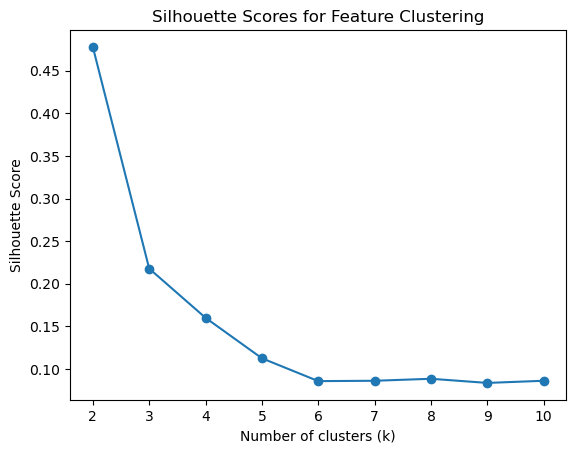

Best number of clusters based on silhouette score (k): 2


In [52]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare the feature matrix (transpose so features are rows)
# Drop metadata columns first
data_for_clustering = filtered_significant_data.drop(columns=['temperature', 'day'])
feature_matrix = data_for_clustering.T  # Now rows = features, columns = samples

# Store clustering metrics
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    print(f"Evaluating for k={k} clusters...")
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_matrix)
    
    labels = kmeans.labels_
    # Compute silhouette score on features
    silhouette_avg = silhouette_score(feature_matrix, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Feature Clustering')
plt.show()

# Get best k
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best number of clusters based on silhouette score (k): {best_k}")

# Final clustering
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(feature_matrix)
cluster_assignments = pd.DataFrame({
    'feature': feature_matrix.index,
    'cluster': final_kmeans.labels_
})


In [29]:
#drop the two non-feature columns: 'temperature' and 'day'
filtered_significant_data = filtered_significant_data.drop(columns=['temperature', 'day'])  # Drop non-feature columns

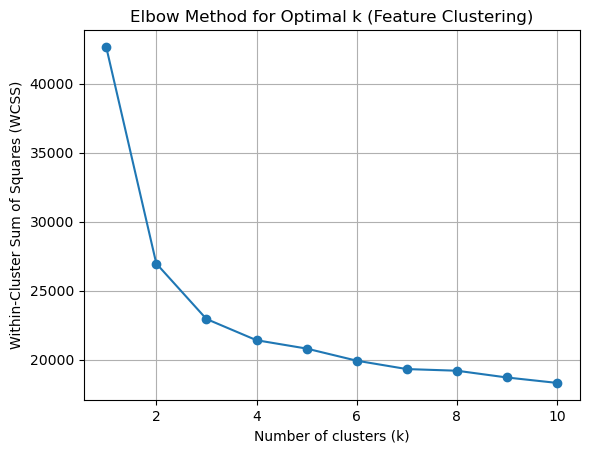

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare data: features as rows, samples as columns
data_for_clustering = filtered_significant_data.drop(columns=['temperature', 'day'])
feature_matrix = data_for_clustering.T  # Transpose: features = rows, samples = columns

# Compute WCSS for k = 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k (Feature Clustering)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


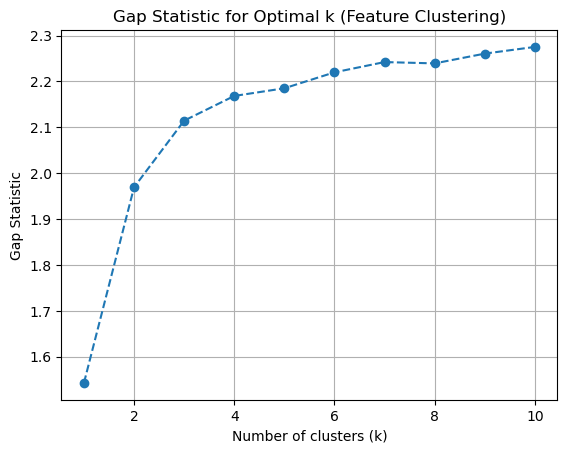

In [54]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def gap_statistic(X, k_max=10, n_refs=10):
    """
    Computes the Gap Statistic to find the optimal number of clusters for features.
    
    Parameters:
    - X: Data to be clustered (n_features x n_samples)
    - k_max: Maximum number of clusters to test
    - n_refs: Number of reference datasets to generate
    
    Returns:
    - gap_values: List of Gap values
    - wcss_values: List of WCSS values for real data
    """
    wcss_values = []
    gap_values = []

    # Actual data WCSS for each k
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss_values.append(kmeans.inertia_)

    # Reference WCSS values
    for k in range(1, k_max + 1):
        ref_wcss = []
        for _ in range(n_refs):
            # Generate reference data with uniform distribution in each dimension
            random_ref = np.random.uniform(low=np.min(X, axis=0),
                                           high=np.max(X, axis=0),
                                           size=X.shape)
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(random_ref)
            ref_wcss.append(kmeans.inertia_)

        gap = np.mean(np.log(ref_wcss)) - np.log(wcss_values[k - 1])
        gap_values.append(gap)

    return gap_values, wcss_values

# Prepare data: features as rows, samples as columns
data_for_clustering = filtered_significant_data.drop(columns=['temperature', 'day'])
feature_matrix = data_for_clustering.T  # Rows = features, Columns = samples

# Run Gap Statistic
gap_values, wcss_values = gap_statistic(feature_matrix.values, k_max=10, n_refs=10)

# Plot the results
plt.figure()
plt.plot(range(1, 11), gap_values, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k (Feature Clustering)')
plt.grid(True)
plt.show()


-->> according to this, 3 would be best.

# step 3: ensemble clustering (random state)

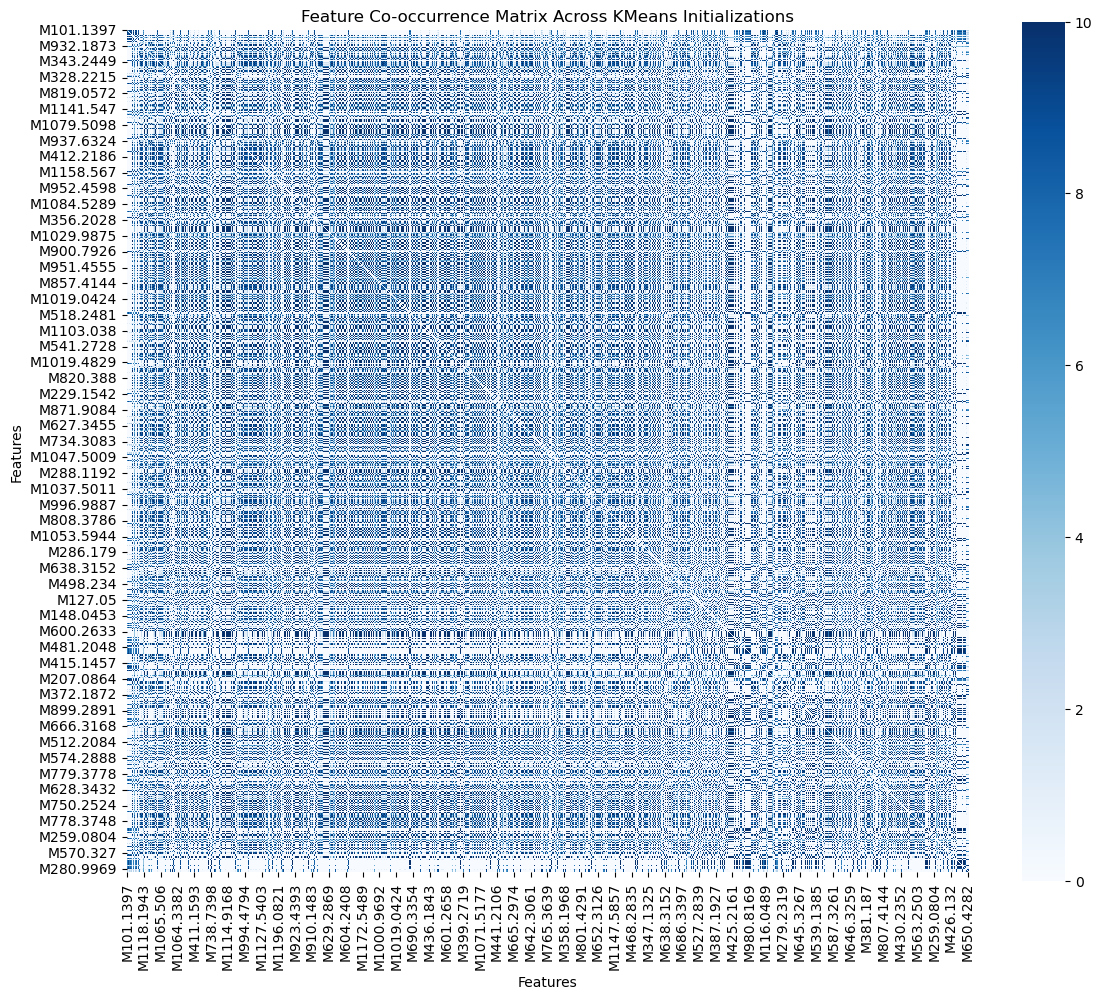

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Prepare the feature matrix (features = rows, samples = columns)
data_for_clustering = filtered_significant_data.drop(columns=['temperature', 'day'])
feature_matrix = data_for_clustering.T  # Transpose so features are rows

best_k = 4  # Chosen number of clusters
random_states = range(10)  # Multiple random initializations
ensemble_labels = []

# Run KMeans with different random states
for state in random_states:
    kmeans = KMeans(n_clusters=best_k, random_state=state)
    kmeans.fit(feature_matrix)
    ensemble_labels.append(kmeans.labels_)

# Create a co-occurrence matrix for features
n_features = feature_matrix.shape[0]
co_occurrence_matrix = np.zeros((n_features, n_features), dtype=int)

# Fill co-occurrence matrix
for labels in ensemble_labels:
    for i in range(n_features):
        for j in range(i + 1, n_features):
            if labels[i] == labels[j]:
                co_occurrence_matrix[i, j] += 1
                co_occurrence_matrix[j, i] += 1  # Symmetric

# Convert to DataFrame for plotting
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=feature_matrix.index,
                                columns=feature_matrix.index)

# Visualize the co-occurrence matrix
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, cmap="Blues", square=True)
plt.title("Feature Co-occurrence Matrix Across KMeans Initializations")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### assign kmeans labels

In [59]:
# Use final k to assign cluster labels to features
best_k = 3
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(feature_matrix)

# Create a DataFrame: features + cluster assignment
feature_clusters = pd.DataFrame({
    'feature': feature_matrix.index,
    'cluster': final_kmeans.labels_
})


In [60]:
# Melt your original filtered z-scored data into long format
long_df = filtered_significant_data.reset_index().melt(
    id_vars=['index', 'temperature', 'day'],
    var_name='feature',
    value_name='zscore'
)

# Merge with cluster assignments
long_df = long_df.merge(feature_clusters, on='feature', how='left')


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

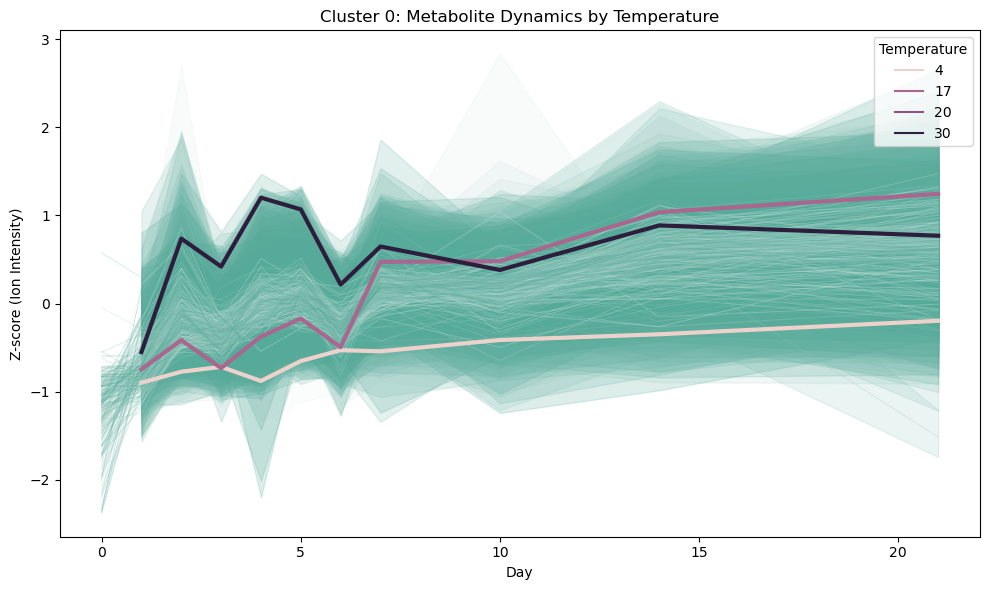

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

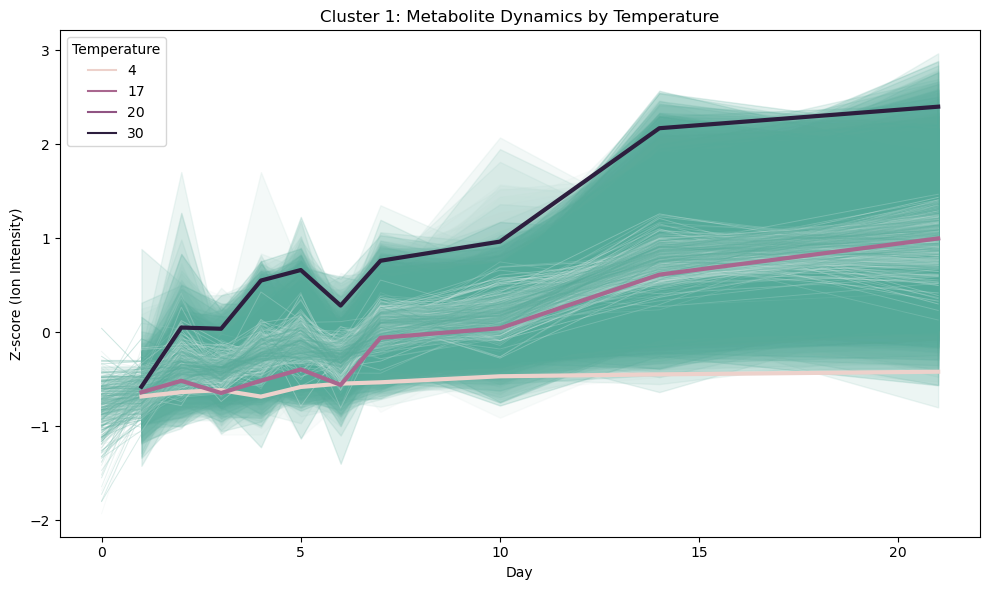

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

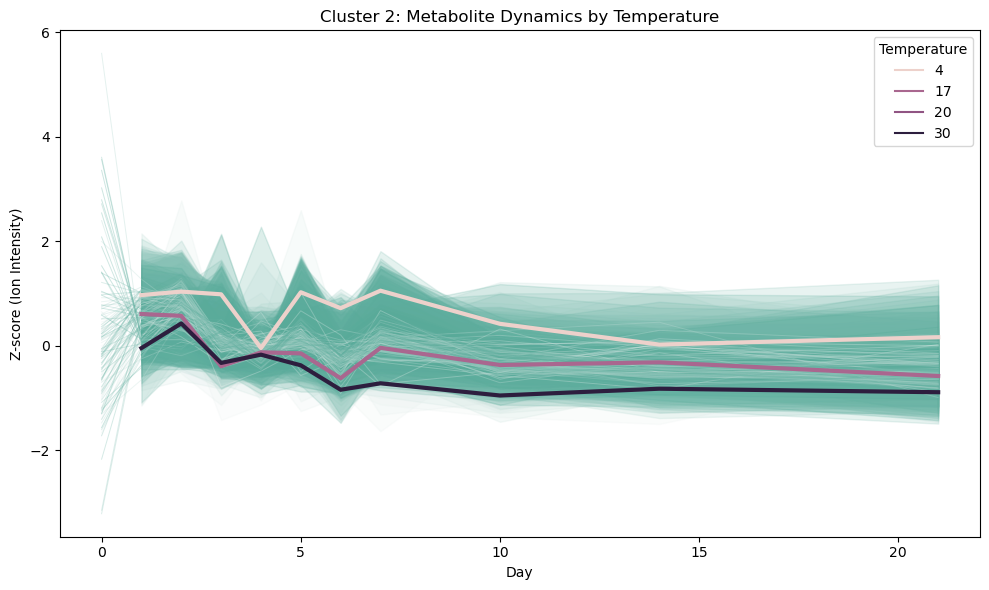

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: make day a numeric type if it's not already
long_df['day'] = pd.to_numeric(long_df['day'])

# Plot each cluster separately
for cluster_id in sorted(long_df['cluster'].unique()):
    cluster_data = long_df[long_df['cluster'] == cluster_id]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=cluster_data, x='day', y='zscore', hue='feature',
                 palette='light:#5A9', linewidth=0.7, alpha=0.3, legend=False)
    
    # Add thick line = mean trajectory per temperature group
    sns.lineplot(data=cluster_data, x='day', y='zscore', hue='temperature',
                 estimator='mean', ci=None, linewidth=3)
    
    plt.title(f'Cluster {cluster_id}: Metabolite Dynamics by Temperature')
    plt.xlabel('Day')
    plt.ylabel('Z-score (Ion Intensity)')
    plt.legend(title='Temperature')
    plt.tight_layout()
    plt.show()


In [63]:
# Drop unwanted sample: 20°C at day 0
filtered_data_clean = filtered_significant_data[~((filtered_significant_data['temperature'] == 20) & (filtered_significant_data['day'] == 0))]

# Melt for long format
long_df = filtered_data_clean.reset_index().melt(
    id_vars=['index', 'temperature', 'day'],
    var_name='feature',
    value_name='zscore'
)

# Merge cluster labels
long_df = long_df.merge(feature_clusters, on='feature', how='left')

# Keep only relevant time points (as string for x-axis label control)
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21']
long_df['day'] = long_df['day'].astype(str)
long_df = long_df[long_df['day'].isin(time_points)]


In [62]:
base_colors = {
    '4': '#9EC8FFFF',     # Sky Blue
    '17': '#FDC067FF',    # Bluish Green
    '30': '#751C6DFF'     # Orange
}


In [ ]:
# Assuming `kmeans` is the fitted KMeans object with 'best_k' clusters
filtered_significant_data['cluster_labels'] = kmeans.labels_


In [87]:
long_df

index temperature day    feature    zscore  cluster
0      366294_255-LP4-16S-0755           4   1  M101.1397  0.969663        2
1      366294_237-LP4-16S-0737           4   2  M101.1397 -0.040148        2
2      366294_198-LP4-16S-0698           4   3  M101.1397  0.223004        2
3      366294_240-LP4-16S-0740           4   4  M101.1397  0.257549        2
4      366294_188-LP4-16S-0688           4   5  M101.1397  0.289716        2
...                        ...         ...  ..        ...       ...      ...
75823  366294_231-LP4-16S-0731          30   6  M627.4082 -0.315696        2
75824  366294_196-LP4-16S-0696          30   7  M627.4082 -0.217145        2
75825  366294_245-LP4-16S-0745          30  10  M627.4082 -0.740828        2
75826  366294_252-LP4-16S-0752          30  14  M627.4082  0.181113        2
75827  366294_212-LP4-16S-0712          30  21  M627.4082  1.333658        2

[75828 rows x 6 columns]

In [81]:
from scipy.stats import kruskal

def collect_kruskal_stats(cluster_df, cluster_id, value_col='zscore'):
    stats_records = []

    for day in time_points:
        subset = cluster_df[cluster_df['day'] == day]
        groups = [
            subset[subset['temperature'] == t][value_col].dropna()
            for t in ['4', '17', '30'] if t in subset['temperature'].values
        ]
        row = {'cluster': cluster_id, 'day': day}
        if len(groups) >= 2 and all(len(g) > 1 for g in groups):
            stat, p = kruskal(*groups)
            row['kruskal_stat'] = stat
            row['p_value'] = p
        else:
            row['kruskal_stat'] = None
            row['p_value'] = None

        stats_records.append(row)

    return pd.DataFrame(stats_records)



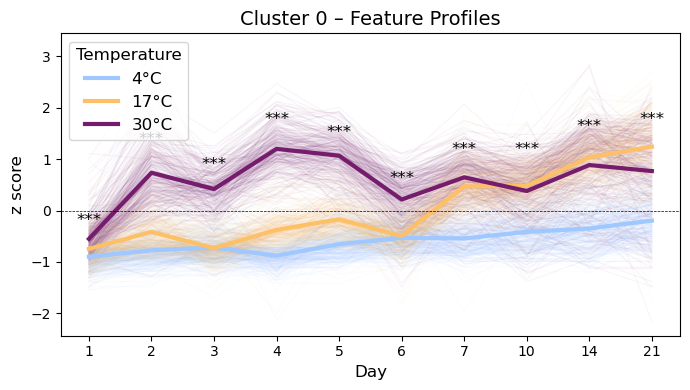

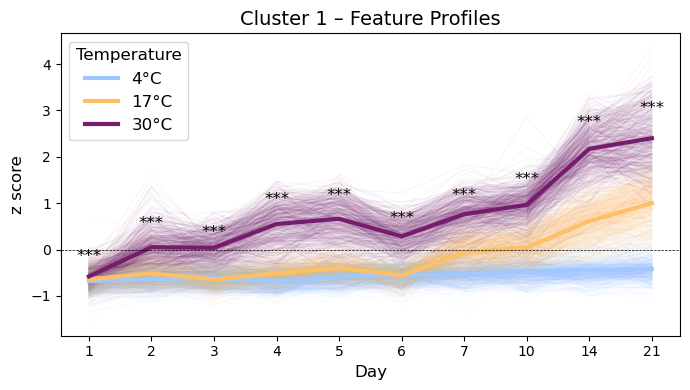

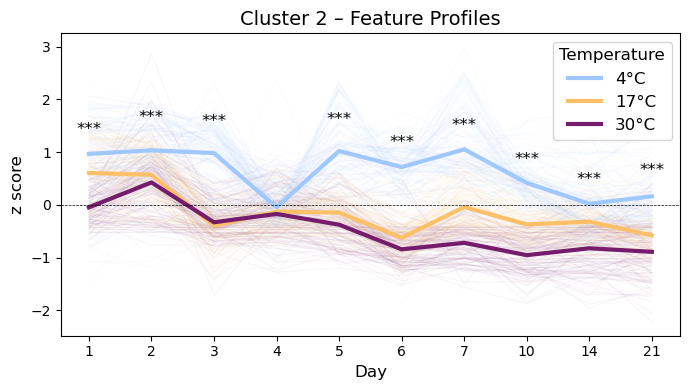

In [86]:
import matplotlib.pyplot as plt
#import requirements for multiple tests:
from statsmodels.stats.multitest import multipletests

# Custom colors for temperatures (must be str for merging/filtering)
base_colors = {
    '4': '#9EC8FFFF',     # Sky Blue
    '17': '#FDC067FF',    # Bluish Green
    '30': '#751C6DFF'     # Orange
}

# Set alpha for fine lines
fine_line_alpha = 0.05

# Make sure temperature and day are strings
long_df['temperature'] = long_df['temperature'].astype(str)
long_df['day'] = long_df['day'].astype(str)
all_stats = []
cluster_axes = {}  # Store axes for later annotation

for cluster_id in sorted(long_df['cluster'].unique()):
    cluster_data = long_df[long_df['cluster'] == cluster_id]
    fig, ax = plt.subplots(figsize=(7, 4))

    # Fine lines
    for feature in cluster_data['feature'].unique():
        for temp in ['4', '17', '30']:
            subset = cluster_data[(cluster_data['feature'] == feature) & (cluster_data['temperature'] == temp)]
            if subset.empty:
                continue
            avg_line = subset.groupby('day')['zscore'].mean().reindex(time_points)
            ax.plot(time_points, avg_line, color=base_colors[temp], linewidth=0.7, alpha=fine_line_alpha)

    # Bold mean lines
    for temp in ['4', '17', '30']:
        subset = cluster_data[cluster_data['temperature'] == temp]
        if subset.empty:
            continue
        mean_line = subset.groupby('day')['zscore'].mean().reindex(time_points)
        ax.plot(time_points, mean_line, color=base_colors[temp], linewidth=3, alpha=1.0, label=f"{temp}°C")

    # Axis and legend formatting
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
    ax.set_xticks(time_points)
    ax.set_title(f"Cluster {cluster_id} – Feature Profiles", fontsize=14)
    ax.set_xlabel("Day", fontsize=12)
    ax.set_ylabel("z score", fontsize=12)
    ax.grid(False)
    ax.legend(title="Temperature", frameon=True, fontsize=12, title_fontsize=12)

    # Store stats and axis
    stats_df = collect_kruskal_stats(cluster_data, cluster_id)
    all_stats.append(stats_df)
    cluster_axes[cluster_id] = (fig, ax)

    # Optional export now (stars added later)
    # fig.savefig(...)
    plt.close(fig)



# Combine and correct
stats_export_df = pd.concat(all_stats, ignore_index=True)
mask = stats_export_df['p_value'].notnull()
reject, pvals_corrected, _, _ = multipletests(stats_export_df.loc[mask, 'p_value'], alpha=0.05, method='fdr_bh')
stats_export_df.loc[mask, 'p_value_adj'] = pvals_corrected
stats_export_df.loc[mask, 'significant'] = reject

# Add stars after correction
for row in stats_export_df.itertuples():
    if row.significant:
        cluster_id = row.cluster
        day = row.day
        cluster_data = long_df[(long_df['cluster'] == cluster_id) & (long_df['day'] == day)]
        max_mean = cluster_data.groupby('temperature')['zscore'].mean().max()
        offset = 0.05 * (cluster_data['zscore'].max() - cluster_data['zscore'].min())
        if row.p_value_adj < 0.001:
            stars = '***'
        elif row.p_value_adj < 0.01:
            stars = '**'
        else:
            stars = '*'
        fig, ax = cluster_axes[cluster_id]
        ax.text(day, max_mean + offset, stars, ha='center', va='bottom', fontsize=12)


output_dir = "Figures/cluster_plots_FIA"
os.makedirs(output_dir, exist_ok=True)

for cluster_id, (fig, ax) in cluster_axes.items():
    output_path = os.path.join(output_dir, f"cluster_{cluster_id:02d}_kruskal_corrected_3clusters.pdf")
    fig.tight_layout()
    fig.savefig(output_path, format='pdf', bbox_inches='tight')
    display(fig)  # or display(fig) if using IPython


stats_export_df.to_excel("Stats/20250516_kruskal_FDR_results_all_clusters_3clusters.xlsx", index=False)



In [88]:
#export long_df to csv:
long_df.to_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters.csv', index=True)

In [89]:
long_df

index temperature day    feature    zscore  cluster
0      366294_255-LP4-16S-0755           4   1  M101.1397  0.969663        2
1      366294_237-LP4-16S-0737           4   2  M101.1397 -0.040148        2
2      366294_198-LP4-16S-0698           4   3  M101.1397  0.223004        2
3      366294_240-LP4-16S-0740           4   4  M101.1397  0.257549        2
4      366294_188-LP4-16S-0688           4   5  M101.1397  0.289716        2
...                        ...         ...  ..        ...       ...      ...
75823  366294_231-LP4-16S-0731          30   6  M627.4082 -0.315696        2
75824  366294_196-LP4-16S-0696          30   7  M627.4082 -0.217145        2
75825  366294_245-LP4-16S-0745          30  10  M627.4082 -0.740828        2
75826  366294_252-LP4-16S-0752          30  14  M627.4082  0.181113        2
75827  366294_212-LP4-16S-0712          30  21  M627.4082  1.333658        2

[75828 rows x 6 columns]

In [92]:
#make a feature list per cluster (feature names):
# Create a dictionary to hold features for each cluster
cluster_feature_dict = {}
for cluster_id in long_df['cluster'].unique():
    cluster_features = long_df[long_df['cluster'] == cluster_id]['feature'].unique()
    cluster_feature_dict[cluster_id] = cluster_features

# Convert to DataFrame for better visualization
cluster_feature_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_feature_dict.items()]))
cluster_feature_df
# Save to CSV
cluster_feature_df.to_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster.csv', index=False)
# Save the cluster assignments to a CSV file
#cluster_assignments.to_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_cluster_assignments.csv', index=False)


In [91]:
cluster_assignments

feature  cluster
0    M101.1397        0
1    M101.4016        0
2     M101.216        0
3    M101.1307        0
4     M101.361        0
..         ...      ...
847  M566.1577        0
848  M280.9969        0
849  M602.3878        1
850  M650.4282        1
851  M627.4082        0

[852 rows x 2 columns]

In [93]:
#import cluster2_kegg_annotated.csv:
# Read the CSV file into a DataFrame
df3 = pd.read_csv('FIA/cluster2_kegg_annotated.csv', index_col=0)


Unnamed: 1    kegg_mz  sample_mz      delta_mz           ppm  \
merge                                                                     
M89.023             1    89.0247     89.023  1.700000e-03  1.909582e+01   
M99.007             2    99.0090     99.007  2.000000e-03  2.020018e+01   
M113.023            3   113.0247    113.023  1.700000e-03  1.504096e+01   
M179.055            4   179.0564    179.055  1.400000e-03  7.818765e+00   
M181.071            5   181.0720    181.071  1.000000e-03  5.522665e+00   
M189.056            6   189.0560    189.056 -2.840000e-14  1.500000e-10   
M195.050            7   195.0513    195.050  1.300000e-03  6.664913e+00   
M207.067            8   207.0666    207.067 -4.000000e-04  1.931746e+00   
M209.063            9   209.0611    209.063 -1.900000e-03  9.088252e+00   
M209.063           10   209.0645    209.063  1.500000e-03  7.174819e+00   
M221.066           11   221.0670    221.066  1.000000e-03  4.523515e+00   
M236.076           12   236.0779    236.076  1.900000e-03  8.048191e+00   
M253.092           13   253.0932    253.092  1.200000e-03  4.741336e+00   
M275.076           14   275.0775    275.076  1.500000e-03  5.453009e+00   
M289.114           15   289.1156    289.114  1.600000e-03  5.534119e+00   
M323.098           16   323.0986    323.098  6.000000e-04  1.857018e+00   
M341.108           17   341.1092    341.108  1.200000e-03  3.517935e+00   
M343.124           18   343.1249    343.124  9.000000e-04  2.622952e+00   
M361.115           19   361.1143    361.115 -7.000000e-04  1.938444e+00   
M383.119           20   383.1198    383.119  8.000000e-04  2.088120e+00   
M385.116           21   385.1143    385.116 -1.700000e-03  4.414274e+00   
M411.123           22   411.1219    411.123 -1.100000e-03  2.675605e+00   
M413.130           23   413.1303    413.130  3.000000e-04  7.261631e-01   
M413.130           24   413.1308    413.130  8.000000e-04  1.936433e+00   
M413.130           25   413.1317    413.130  1.700000e-03  4.114911e+00   
M421.075           26   421.0755    421.075  5.000000e-04  1.187436e+00   
M425.131           27   425.1295    425.131 -1.500000e-03  3.528337e+00   
M429.125           28   429.1253    429.125  3.000000e-04  6.990965e-01   
M503.161           29   503.1620    503.161  1.000000e-03  1.987431e+00   
M545.172           30   545.1726    545.172  6.000000e-04  1.100569e+00   
M593.193           31   593.1932    593.193  2.000000e-04  3.371583e-01   
M647.205           32   647.2043    647.205 -7.000000e-04  1.081575e+00   
M665.215           33   665.2149    665.215 -1.000000e-04  1.503274e-01   
M827.268           34   827.2677    827.268 -3.000000e-04  3.626396e-01   
M989.322           35   989.3205    989.322 -1.500000e-03  1.516192e+00   
M1151.375          36  1151.3733   1151.375 -1.700000e-03  1.476498e+00   

           Exact.Mass                                        Compound_ID  \
merge                                                                      
M89.023       90.0317  C00184, C00186, C00256, C00577, C01013, C01432...   
M99.007      100.0160                                             C19524   
M113.023     114.0317                             C00596, C07091, C21187   
M179.055     180.0634  C00031, C00095, C00124, C00137, C00159, C00221...   
M181.071     182.0790  C00392, C00794, C01489, C01507, C01697, C01722...   
M189.056     190.0630                     C11052, C14105, C15102, C17916   
M195.050     196.0583  C00257, C00514, C00770, C00800, C00817, C00880...   
M207.067     208.0736                             C02381, C05610, C09816   
M209.063     210.0681                     C03164, C16204, C16206, C20226   
M209.063     210.0715                                             C11165   
M221.066     222.0740                                             C02655   
M236.076     237.0849             C01133, C03146, C03408, C03521, C21333   
M253.092     254.1002                                     C05401, C11546   
M275.076     276.084

In [94]:
df4 = pd.read_csv('FIA/cluster1_kegg_annotated.csv', index_col=0)
df4

Unnamed: 1    kegg_mz  sample_mz  delta_mz        ppm  Exact.Mass  \
merge                                                                          
M88.039             1    88.0407     88.039    0.0017  19.309251     89.0477   
M116.049            2   116.0508    116.049    0.0018  15.510449    117.0578   
M116.070            3   116.0720    116.070    0.0020  17.230684    117.0790   
M119.049            4   119.0505    119.049    0.0015  12.599695    120.0575   
M127.050            5   127.0516    127.050    0.0016  12.593309    128.0586   
...               ...        ...        ...       ...        ...         ...   
M652.313           81   652.3143    652.313    0.0013   1.992904    653.3213   
M765.364           82   765.3654    765.364    0.0014   1.829192    766.3724   
M955.454           83   955.4547    955.454    0.0007   0.732635    956.4617   
M1047.501          84  1047.5020   1047.501    0.0010   0.954652   1048.5090   
M1148.554          85  1148.5524   1148.554   -0.0016   1.393058   1149.5594   

                                                 Compound_ID  \
merge                                                          
M88.039    C00041, C00099, C00133, C00213, C01401, C01537...   
M116.049                                      C00463, C16074   
M116.070   C00183, C00431, C00719, C01799, C01826, C03571...   
M119.049   C00601, C02083, C05627, C06758, C07113, C07209...   
M127.050                      C00906, C05715, C05717, C21028   
...                                                      ...   
M652.313                                              C15661   
M765.364                                              C12560   
M955.454                                              C22654   
M1047.501                                             C08910   
M1148.554                                             C15745   

                                                        Name  \
merge                                                          
M88.039    L-Alanine, beta-Alanine, D-Alanine, Sarcosine,...   
M116.049                          Indole, Phenylacetonitrile   
M116.070   L-Valine, 5-Aminopentanoate, Betaine, D-Norval...   
M119.049   Phenylacetaldehyde, Styrene oxide, 4-Hydroxyst...   
M127.050   5,6-Dihydrothymine, gamma-Amino-gamma-cyanobut...   
...                                                      ...   
M652.313                                             A 80987   
M765.364                                 Saquinavir mesylate   
M955.454   Quillaic acid 3-O-beta-D-xylosyl-1,3-(beta-D-g...   
M1047.501                                          Ruscoside   
M1148.554                                 Aeruginopeptin 95B   

                                            Chemical.Formula      plusF  
merge                                                                    
M88.039     C3H7NO2,  C3H7NO2,  C3H7NO2,  C3H7NO2,  C3H7N...   108.0461  
M116.049                                       C8H7N,  C8H7N   136.0562  
M116.070    C5H11NO2,  C5H11NO2,  C5H11NO2,  C5H11NO2,  C...   136.0774  
M119.049    C8H8O,  C8H8O,  C8H8O,  C8H8O,  C8H8O,  C8H8O...   139.0559  
M127.050           C5H8N2O2,  C5H8N2O2,  C5H8N2O2,  C5H8N2O2   147.0570  
...                                                      ...        ...  
M652.313                                          C37H43N5O6   672.3197  
M765.364                                  C38H50N6O5. CH4SO3   785.3708  
M955.454                                           C47H72O20   975.4601  
M1047.501                                          C50H80O23  1067.5074  
M1148.554                                        C56H79N9O17  1168.5578  

[85 rows x 10 columns]

In [98]:
long_form_df = pd.concat([
    pd.DataFrame({'cluster': cluster_id, 'feature': features})
    for cluster_id, features in cluster_feature_dict.items()
], ignore_index=True)



In [107]:
long_form_df

cluster    feature
0          2  M101.1397
1          2  M101.4016
2          2   M101.216
3          2  M101.1307
4          2   M101.361
..       ...        ...
847        1   M154.061
848        1  M615.3079
849        1  M559.2901
850        1  M544.2744
851        1  M136.0753

[852 rows x 2 columns]

In [110]:
#make a new column in long_form_df called 'weight', take the 'feature' and strip off the M (first character),
#and convert it to a float
long_form_df['weight'] = long_form_df['feature'].str[1:].astype(float)

#then round to the 3rd decimal:
long_form_df['weight'] = long_form_df['weight'].round(3)
long_form_df
#then add again an M in fromt of the weight column:
#also make sure that zeros at the end (last character) remain in the label:
long_form_df['feature2'] = long_form_df['weight'].apply(lambda x: f"M{x:.3f}" if x % 1 != 0 else f"M{x:.0f}")


long_form_df

cluster    feature   weight  feature2
0          2  M101.1397  101.140  M101.140
1          2  M101.4016  101.402  M101.402
2          2   M101.216  101.216  M101.216
3          2  M101.1307  101.131  M101.131
4          2   M101.361  101.361  M101.361
..       ...        ...      ...       ...
847        1   M154.061  154.061  M154.061
848        1  M615.3079  615.308  M615.308
849        1  M559.2901  559.290  M559.290
850        1  M544.2744  544.274  M544.274
851        1  M136.0753  136.075  M136.075

[852 rows x 4 columns]

In [111]:
#now merge df3 to long_form_df via 'feature' column and index, and left join for long_form_df:
merged_df = pd.merge(long_form_df, df3, left_on='feature2', right_on = df3.index, how='left')

In [112]:
#then also merge df4 to the merged_df:
merged_df = pd.merge(merged_df, df4, left_on='feature2', right_on = df4.index, how='left')

In [113]:
#export merged_df to csv:
merged_df.to_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv', index=False)

In [ ]:
cluster

In [96]:
cluster_0_df

2           0           1
0    M101.1397  M1065.3544  M1011.9742
1    M101.4016   M303.1798  M1128.8501
2     M101.216  M1090.4999  M1082.1758
3    M101.1307   M1072.182  M1162.5547
4     M101.361   M932.1873   M1103.537
..         ...         ...         ...
273        NaN    M570.327   M1067.484
274        NaN   M373.1453   M568.2434
275        NaN   M387.0952   M798.8784
276        NaN   M602.3878   M652.3126
277        NaN   M650.4282   M330.1654

[278 rows x 3 columns]